In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

Seaborn là libary visualize data phong phú và phức tạp do đó sẽ được chia ra các loại plot chứ không xắp xếp cơ bản theo matplotlib.

Tuy nhiên một vài function của matplotlib cũng sử dụng được trong seaborn do seaborn là một phiên bản phong phú, phức tạp và thể hiện thông tin chi tiết hơn của matplotlib.

# Distribution Plots

* Là các biểu đồ thích hợp để so sánh phạm vi và phân phối cho các nhóm dữ liệu số. Bao gồm:

  * distplot
  * jointplot
  * pairplot



# I) distplot

* distplot cho thấy các phân phối của tập hợp các biến đơn (univariate set) các giá trị (observation) trong dữ liệu.


In [3]:
dataset = sns.load_dataset('tips')
dataset

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


## 1) distplot (basic)

* distplot: ngoài thể hiện bằng một histogram (ví dụ mật độ của giá bill), còn thêm một đường kde (line màu xanh) để ước tính, 

* Đường kde (kernel density estimation): để ước tính hàm mật độ xác suất của một biến ngẫu nhiên

## Thông số của:

distplot(

    Nhập dữ liệu (Series, array, list), 
    axlabel="Total Bill" : label của cột x
)

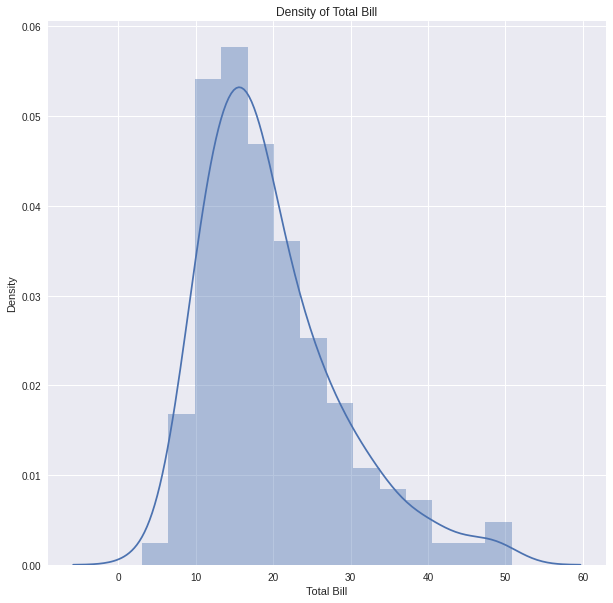

In [5]:
plt.figure(figsize=(10,10))
plt.style.use('seaborn')
sns.distplot(dataset.iloc[:, 0].values, axlabel="Total Bill");
plt.title('Density of Total Bill')

plt.show()

## 2) distplot with customize list of bin

Với phương pháp này em có thể plot ra một distplot với bin tùy chỉnh 

## Thông số của:

bin = [0, 10, 20, 30, 40, 50, 60] : tạo một list cho tập hợp bin tùy chỉnh

distplot(

    Nhập dữ liệu (Series, array, list), 
    bins = bin : show bin theo tập hợp list của bin mới tạo,
    axlabel="Total Bill" : label của cột x
)

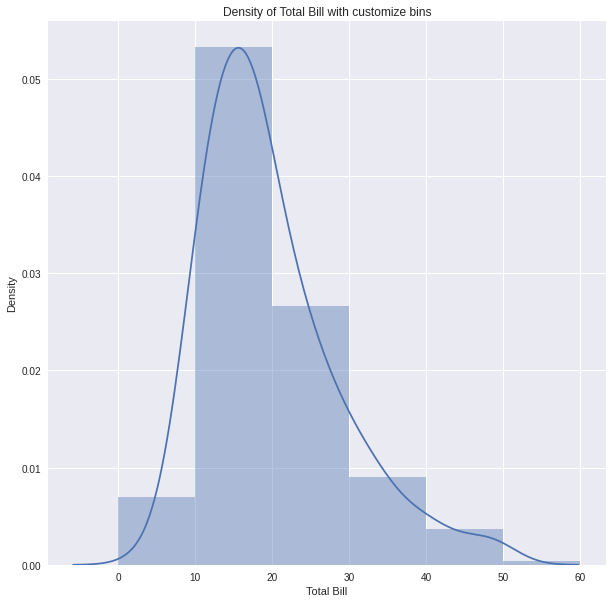

In [6]:
bin = [0, 10, 20, 30, 40, 50, 60]

plt.figure(figsize=(10,10))
plt.style.use('seaborn')
sns.distplot(dataset.total_bill, bins= bin, axlabel="Total Bill")
plt.title('Density of Total Bill with customize bins')

plt.show()

## 3) distplot without kde

Với phương pháp này ta có thể thấy được chỉ có histogram của biểu đồ, giá trị của cột y sẽ thay đổi cho phù hợp với thông tin của histogram


distplot(

    Nhập dữ liệu (Series, array, list), 
    bins = bin,
    kde=False : tắt line của kde,
    axlabel="Total Bill" : label của cột x
)

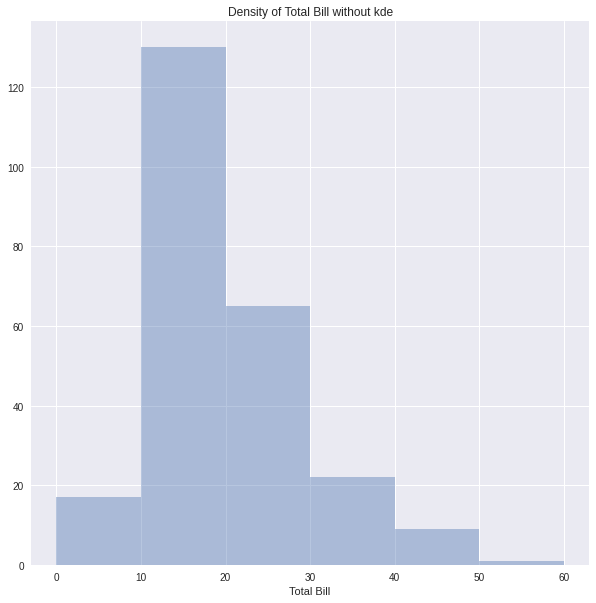

In [7]:
plt.figure(figsize=(10,10))
plt.style.use('seaborn')
sns.distplot(dataset.total_bill,kde=False,bins=bin, axlabel="Total Bill" )
plt.title('Density of Total Bill without kde')

plt.show()

## 4) distplot without Histogram

Với phương pháp này ta có thể thấy được chỉ có kde của biểu đồ, giá trị của cột y sẽ thay đổi cho phù hợp với thông tin của histogram


distplot(

    Nhập dữ liệu (Series, array, list), 
    bins = bin,
    hist=False : tắt histogram chỉ thấy kde,
    axlabel="Total Bill" : label của cột x
)

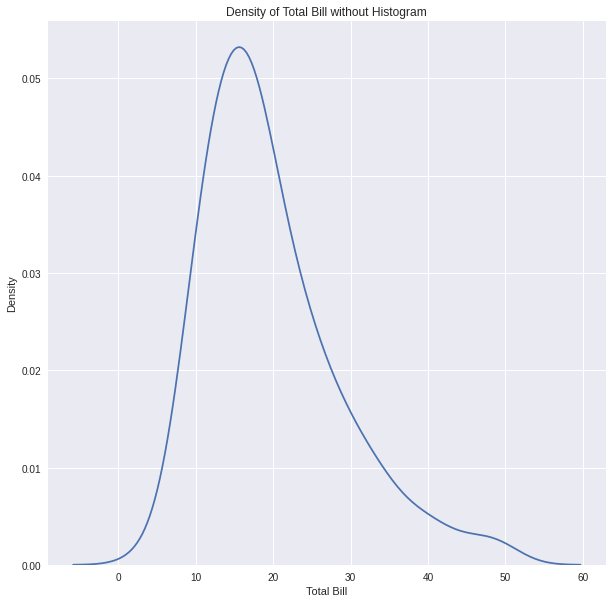

In [8]:
plt.figure(figsize=(10,10))
plt.style.use('seaborn')
sns.distplot(dataset.total_bill,hist=False,bins=bin, axlabel="Total Bill")
plt.title('Density of Total Bill without Histogram')

plt.show()

# II) Jointplot

jointplot() cho biết mối quan hệ giữa 2 variable cũng như distribution của mỗ variable

    ở giữa plot lớn nhất là relationship plot (Joint distribution)

    ở hai bên trên và bên phải là marginal plot (Marginal Distributions của x và y)



## Thông số:

jointplot(
  
    x='total_bill' : giá trị của cột x và Marginal Distributions bên trên,

    y='tip' : giá trị của cột y và Marginal Distributions bên phải,

    data=dataset : cả bộ dữ liệu,

    kind='scatter', : loại plot cho relationship plot 

    height=10, : kich thước giá trị (height x height) vì plot luôn có kích thước hình vuông

    hue='sex', : cột nào trong bộ dữ liệu sử dụng cho color encoding.

    ratio=4, : kích thước của relationship plot so với marginal plot (số càng nhỏ marginal plot càng bự, số càng lớn marginal plot càng nhỏ)

    space=0.25 : khoảng cách giữa relationship plot và marginal plot)

a) Các dạng biểu đồ của relationship plot

* “scatter” : scatter plot đồ thị cơ bản để hiển thị mối quan hệ giữa 2 biến

* “reg” : Regression plot đồ thị hiển thị, khoảng tin cậy (confidence interval) và tính tuyến

* “resid” : residual plot phần dư của dữ liệu vào dòng hồi quy (regression line) bao gổm trên trục đứng (vertical axis) và biến độc lập (independent variable) trên trục ngang (horizontal axis)

* “kde” : kernel density estimation plot để ước tính hàm mật độ xác suất của một biến

* “hex” : Hexagon Bin plot các tập dữ liệu lớn mà một biểu đồ phân tán (scatter plot) sẽ bị plot chồng lên nhau (overplotting)

* "hist" histogram tóm tắt dữ liệu trên 1 khoảng

b) các cặp plot sẽ (join) xuất hiện chung

* relationship plot là “scatter” thì marginal plot "kde" thích hợp cho thông số "hue"

* relationship plot là “reg” thì marginal plot "kde" , "hist" không sử dụng được thông số "hue"

* relationship plot là “resid” thì marginal plot "hist" không sử dụng được thông số "hue"

* relationship plot là “kde” thì marginal plot "kde" không thích hợp cho thông số "hue" trong trường hợp này

* relationship plot là “hex” thì marginal plot "hist" không sử dụng được thông số "hue"

* relationship plot là “hist” thì marginal plot "hist" thích hợp cho thông số "hue"


## 1) kind='scatter'

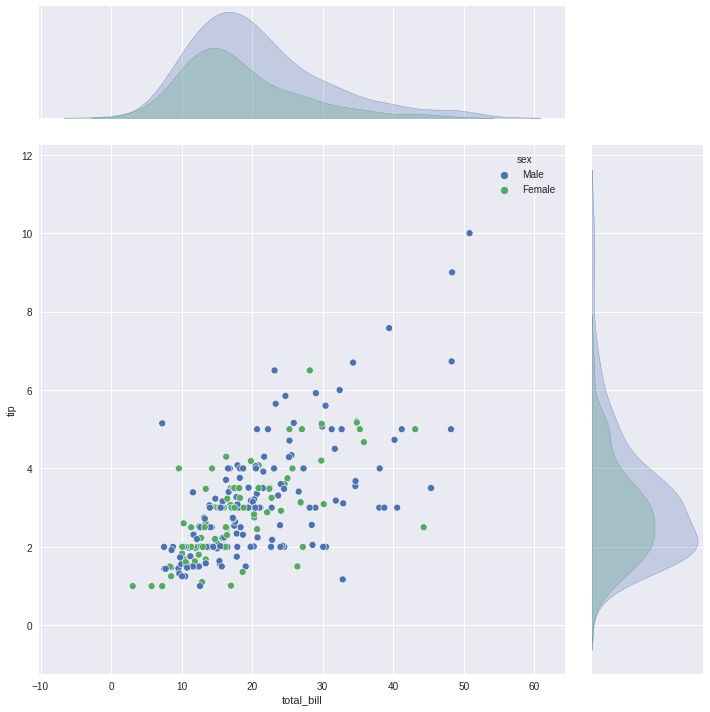

In [9]:

sns.jointplot(x='total_bill',
              y='tip',
              data=dataset,
              kind='scatter', 
              height=10, 
              hue='sex',
              ratio=4,
              space=0.25)

## 2) kind='reg'

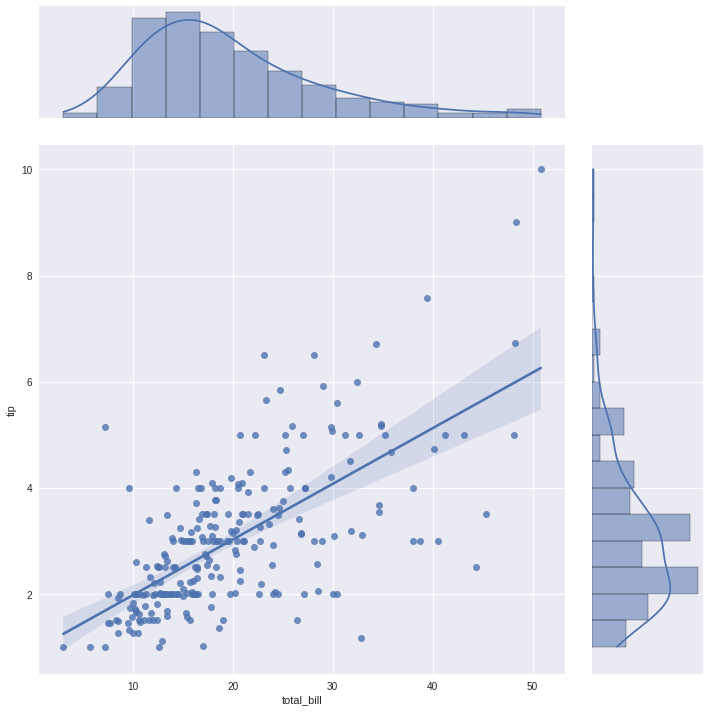

In [10]:
sns.jointplot(x='total_bill',
              y='tip',
              data=dataset,
              kind='reg', 
              height=10,
              ratio=4,
              space=0.25)

## 3) kind='resid'

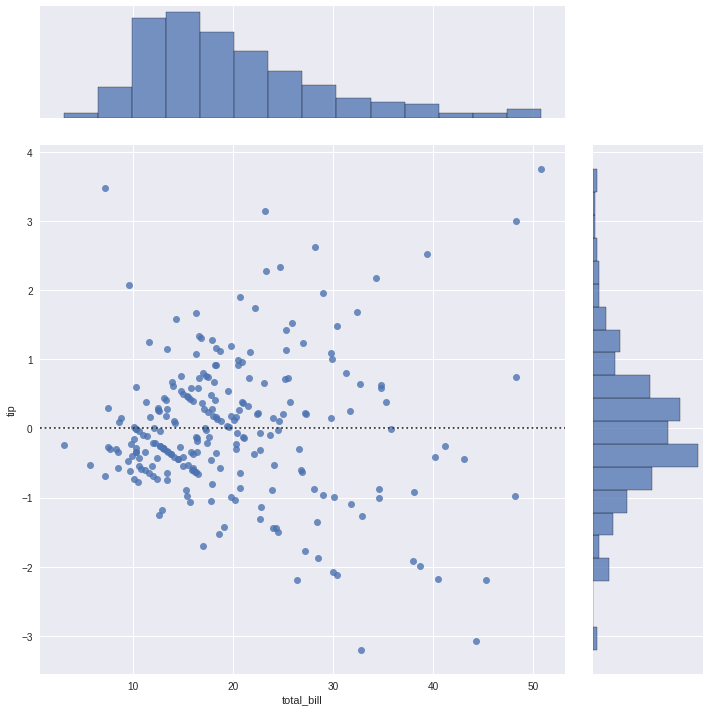

In [11]:
sns.jointplot(x='total_bill',
              y='tip',
              data=dataset,
              kind='resid', 
              height=10,
              ratio=4,
              space=0.25)

## 4) kind='kde'

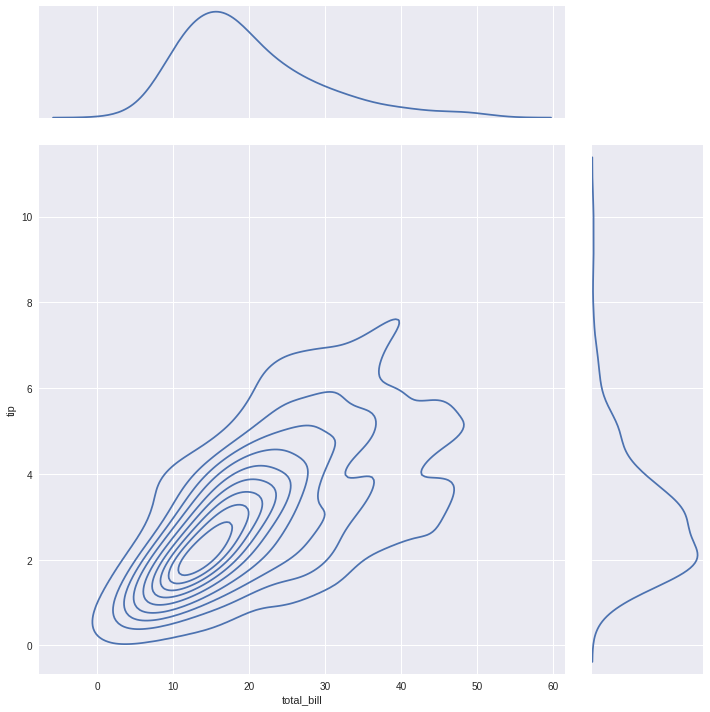

In [12]:


sns.jointplot(x='total_bill',
              y='tip',
              data=dataset,
              kind='kde',
              height=10,
              ratio=4,
              space=0.25)

## 5) kind='hex'

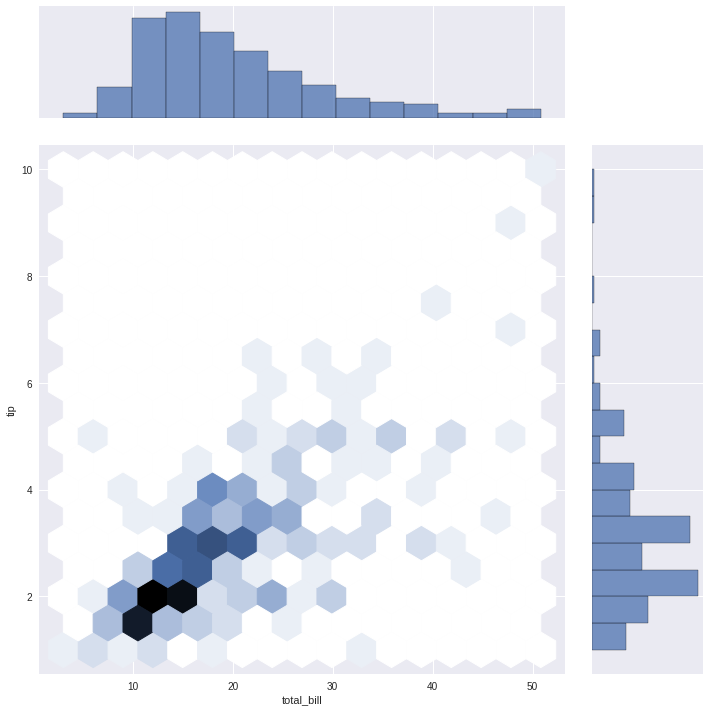

In [13]:


sns.jointplot(x='total_bill',
              y='tip',
              data=dataset,
              kind='hex', 
              height=10,
              ratio=4,
              space=0.25)

## 6) kind='hex'

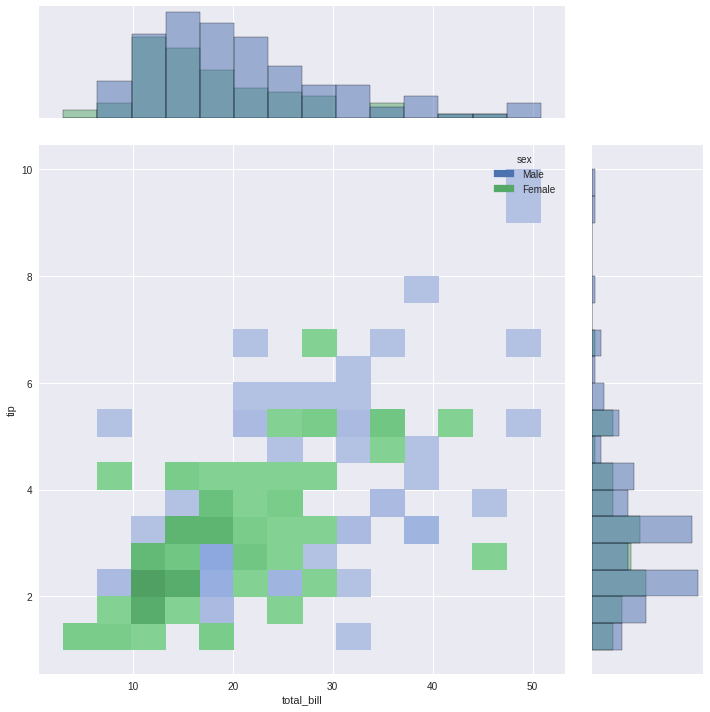

In [14]:


sns.jointplot(x='total_bill',
              y='tip',
              data=dataset,
              kind='hist', 
              height=10, 
              hue='sex',
              ratio=4,
              space=0.25)

## 7) jointplot with plot_joint() function

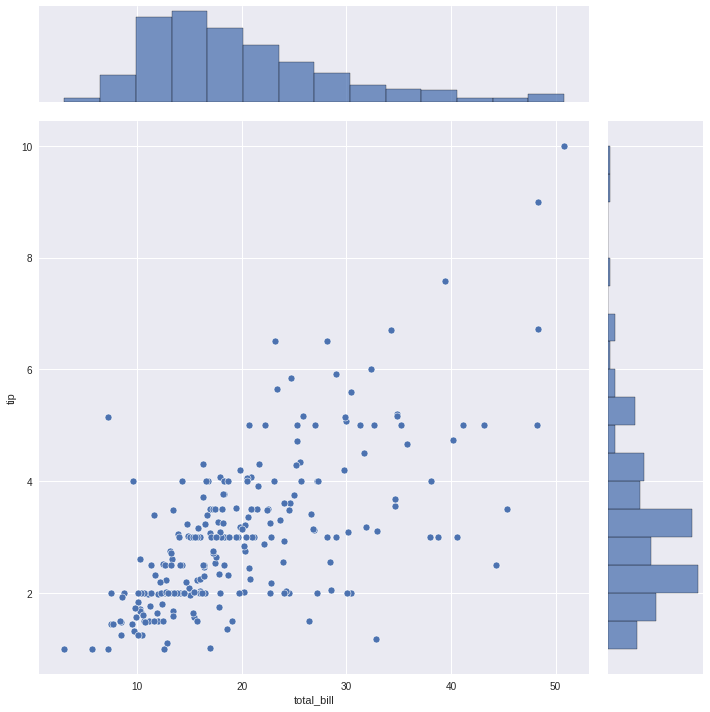

In [15]:

sc1 = sns.jointplot(x='total_bill',
              y='tip',
              data=dataset,
              height=10,
              kind='scatter')

In [16]:
type(sc1)

seaborn.axisgrid.JointGrid

* Vì jointplot có thuộc tính JointGrid nến có thể sử dụng plot_joint()

Thông số:

plot_joint(
  
    sns.kdeplot, : plot muốn join
    color='gray', màu của plot muốn join
)

sc1.figure : show hình plot

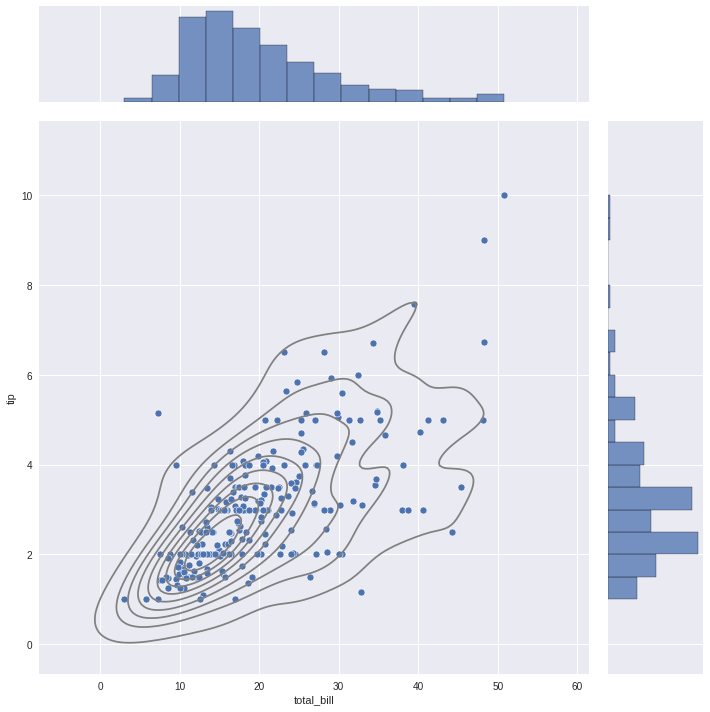

In [17]:
sc1.plot_joint(sns.kdeplot, color='gray');
sc1.figure


## 8) Customize Jointplot and Marginal Distribution

* Nếu em muốn tùy chình Jointplot sẽ sử dụng "joint_kws=" nghĩa là jointplot keywords. Tất cả tùy chỉnh đều phải trong một dictionary.

* Còn em muốn tùy chình Marginal Distribution sẽ sử dụng "maginal_kws=" nghĩa là marginal distribution keywords. Tất cả tùy chỉnh đều phải trong một dictionary.

### a) Customize "joint_kws=" 

Thông số của:

  joint_kws={

    'marker':5, : mẫu marker được sử dụng

    'ci':None : Tắt thể hiện khoảng tin cậy (Confidence Interval)

    'order': 4 : ước tính số mũ của hồi quy đa thức (polynomial regression) 

  }

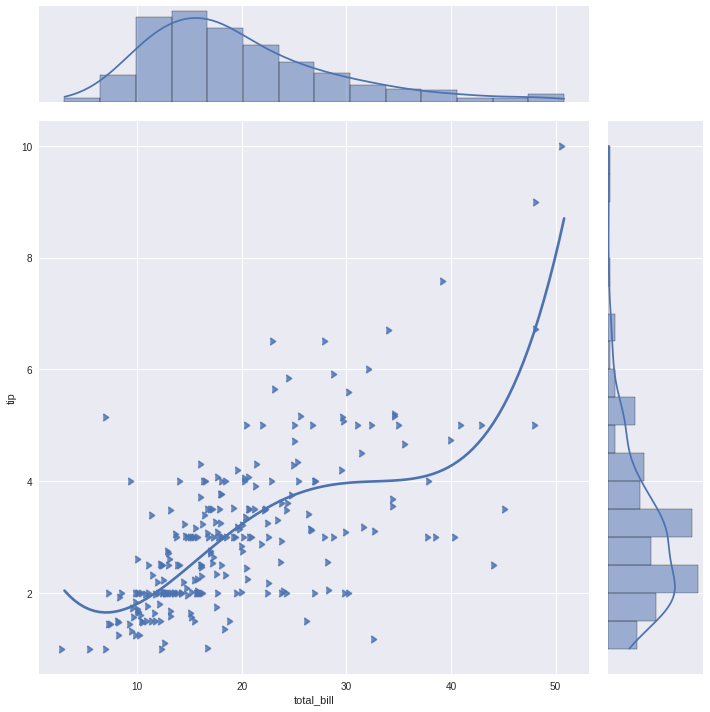

In [18]:
sns.jointplot(x='total_bill',
              y='tip',
              data=dataset,
              kind='reg', 
              joint_kws={'marker':5,
                         'ci':None,
                         'order': 4
                         },
              height=10,)

### a) Customize "marginal_kws=" 

Thông số của:

  marginal_kws={

    'color':'red', : fill màu cho biểu đồ. Khi không có bật chức năng "shade" thì chỉ tô màu của line, sau khi bật shade sẽ tô màu cả shade và line
    
    'lw':4, : chiều rộng của line
                            
    'shade':True : bật chức năng shade (sau khi bật thì màu sẽ tô luôn shade)

  }

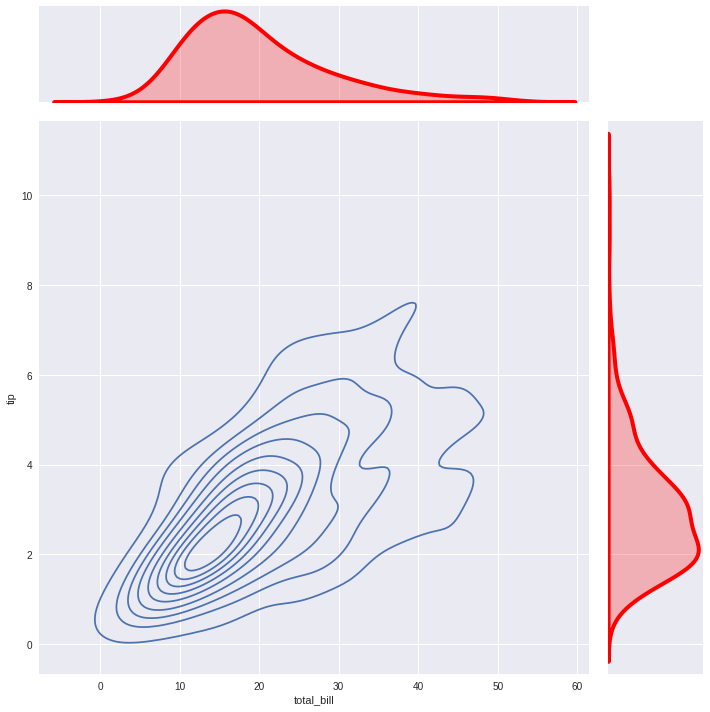

In [19]:
sns.jointplot(x='total_bill',
              y='tip',
              data=dataset,
              kind='kde',
              marginal_kws={'color':'red',
                            'lw':4,
                            'shade':True },
              height=10,)

# III) pairplot


pairplot sẽ vẽ biểu đồ các mối quan hệ theo cặp (pairwise relationships) trên toàn bộ dataframe (đối với các cột số( numerical columns)) và hỗ trợ đối số màu sắc (hue argument) (đối với các cột phân loại(categorical columns), boolean column sẽ được xếp vào categorical trong pairplot)

pairplot bao gồm 2 loại biểu đồ nhỏ:

* Diagonal: đồ thị của chính giá trị đó sẽ thể hiện bằng 1 distribution plot như histogram (không có hue) kde plot (khi có hue)

* Off-diagonal: đồ thị relational giữa 2 giá trị 

Các tick label sẽ có relational với các off-diagonal

## 1) pairplot (basic)

Thông số:

pairplot(
  
    bộ dữ liệu,
    hue='sex', :  hỗ trợ đối số màu sắc (cho categorical, boolean)
    palette='coolwarm' : set bộ màu do có nhiều hơn 1 giá trị, 
    height=10, : set kích thước cho biểu đồ
    
    )

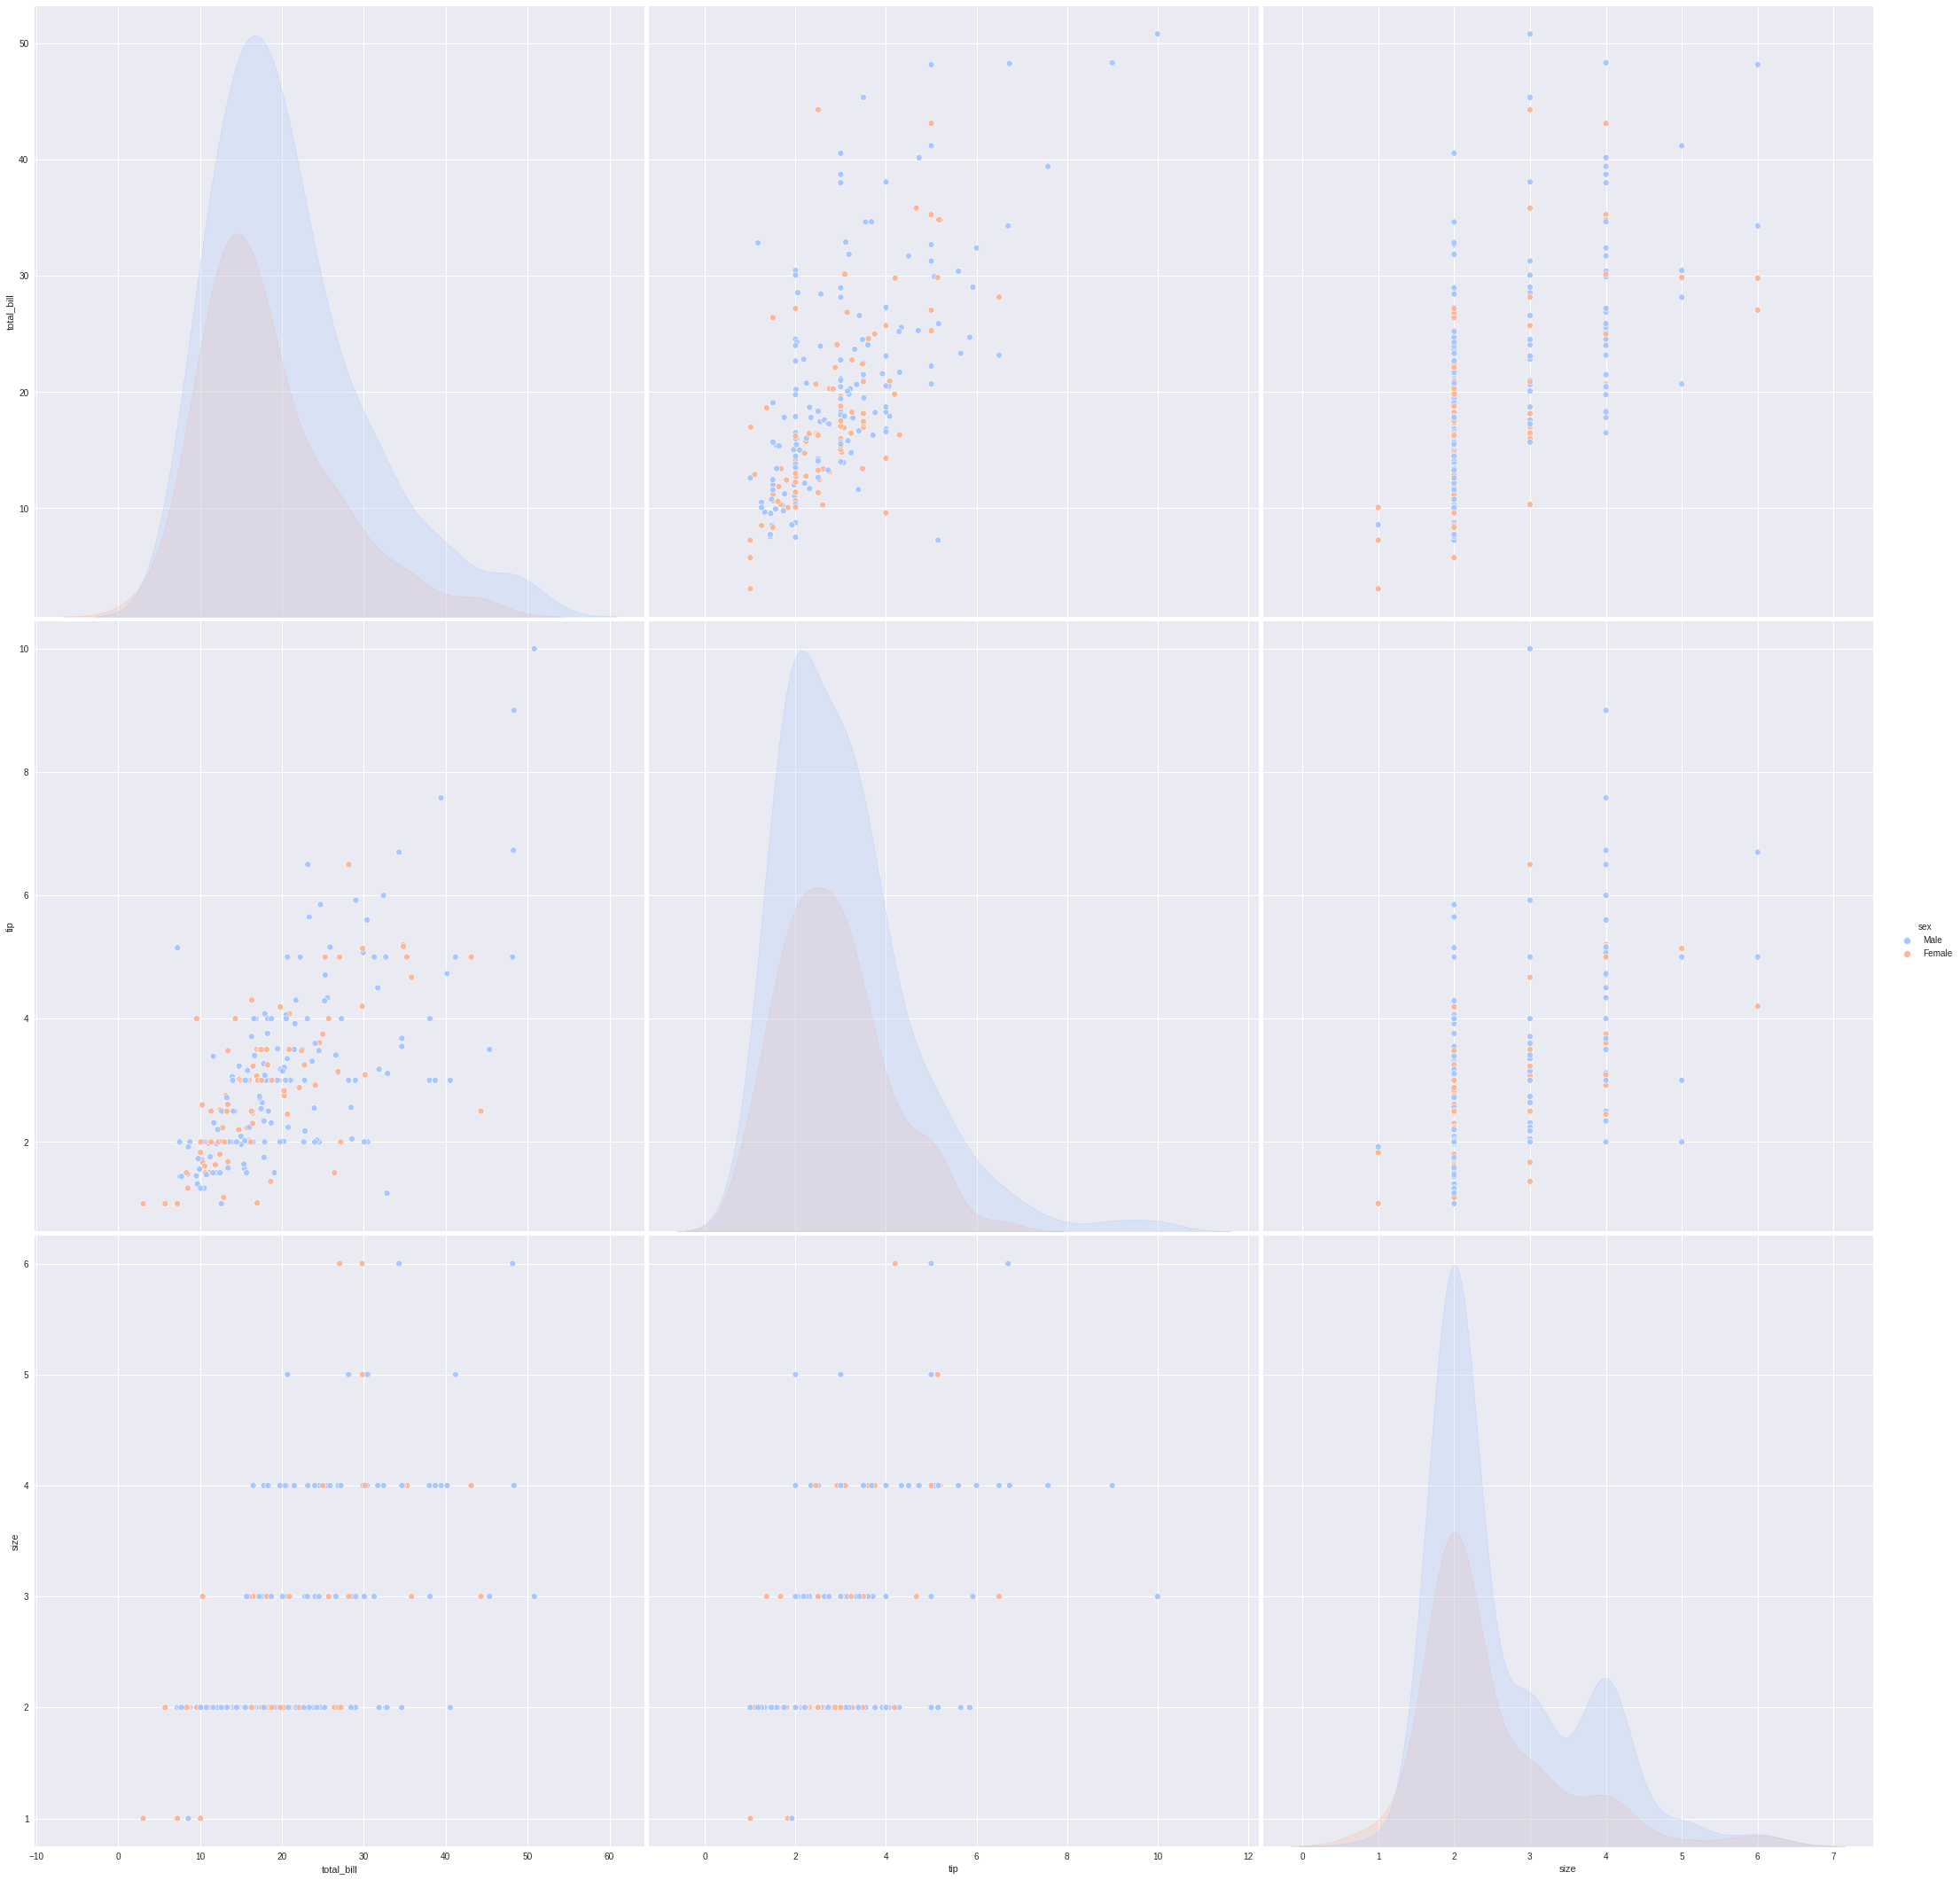

In [20]:
sns.pairplot(dataset,hue='sex',palette='coolwarm', height=10, )




## 2) Customize Diagonal


Thông số:

pairplot(
  
    bộ dữ liệu,
    hue='sex', :  hỗ trợ đối số màu sắc (cho categorical, boolean)
    diag_kind='hist' : Thay đổi diagonal thành Histogram nhưng sẽ không ảnh hưởng off-diagonal
    palette='rocket' : set bộ màu do có nhiều hơn 1 giá trị, 
    height=10, : set kích thước cho biểu đồ
    
    )

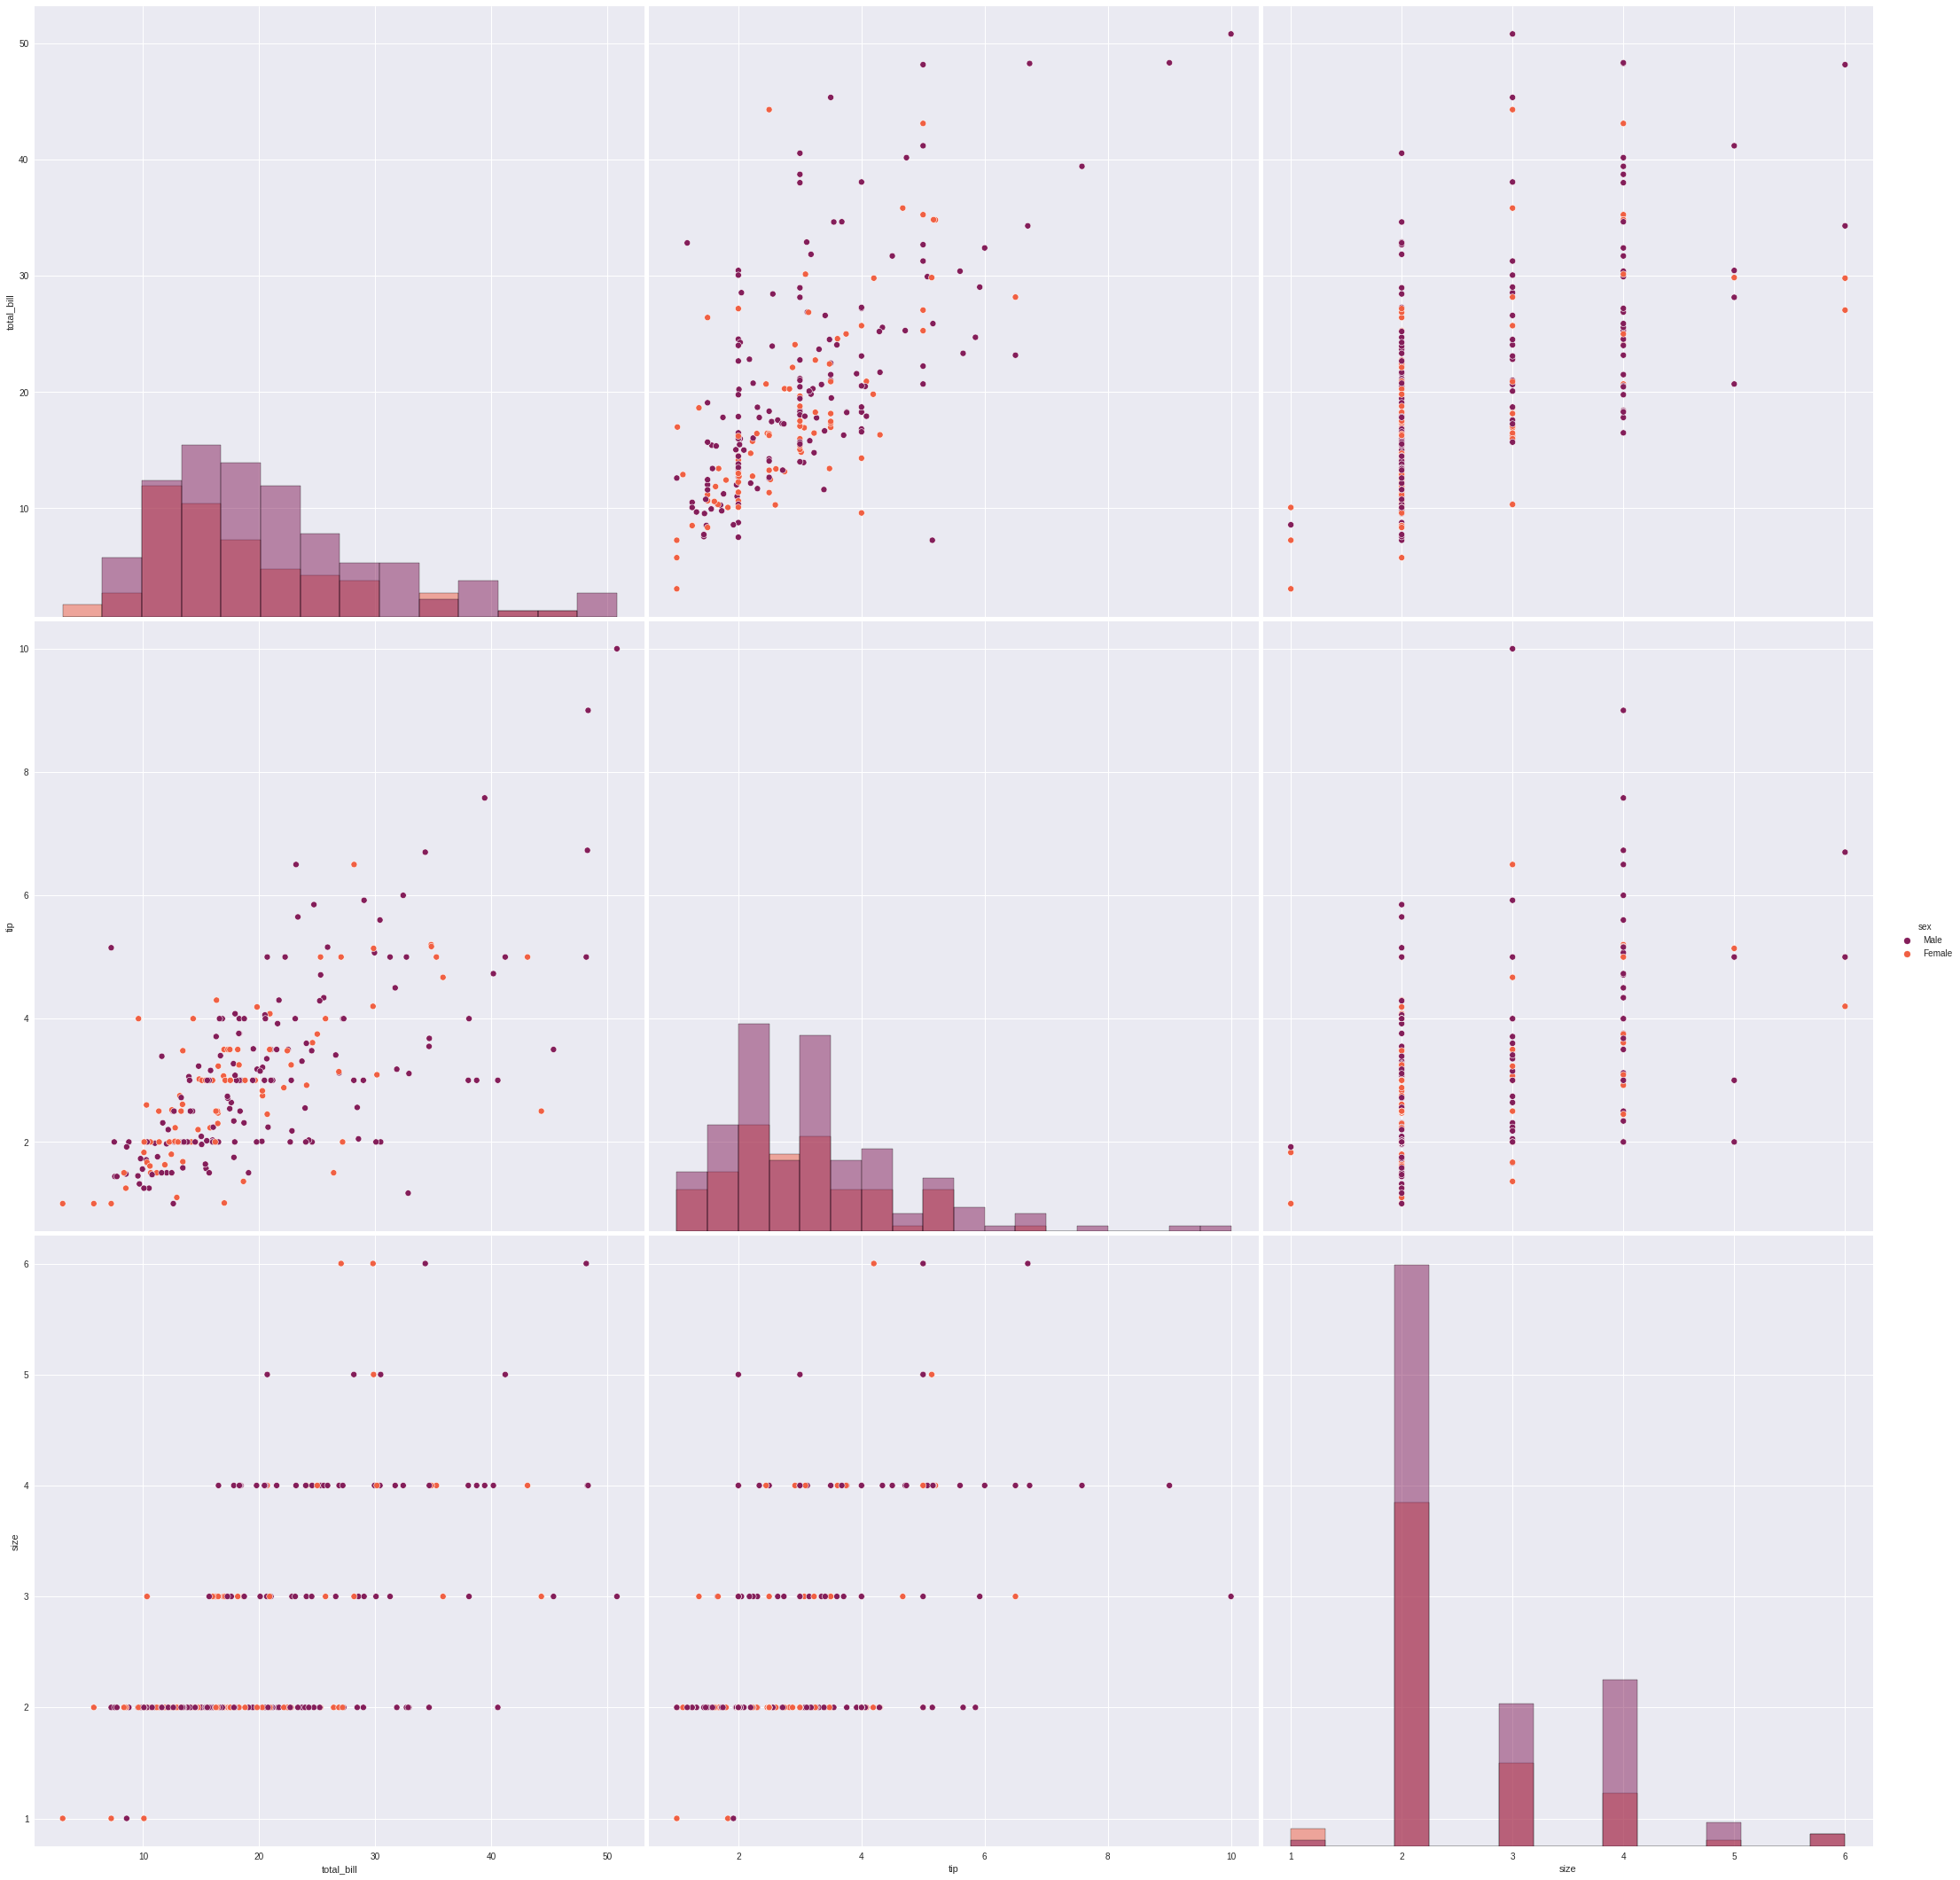

In [21]:
sns.pairplot(dataset,hue='sex', diag_kind='hist',palette='rocket', height=10, )

## 3) Customize off-diagonal

Thông số:

pairplot(
  
    bộ dữ liệu,
    hue='sex', :  hỗ trợ đối số màu sắc (cho categorical, boolean)
    kind='reg' : Thay đổi off-diagonal thành regression nhưng sẽ không ảnh hưởng diagonal
    palette='rocket' : set bộ màu do có nhiều hơn 1 giá trị, 
    height=10, : set kích thước cho biểu đồ
    
    )

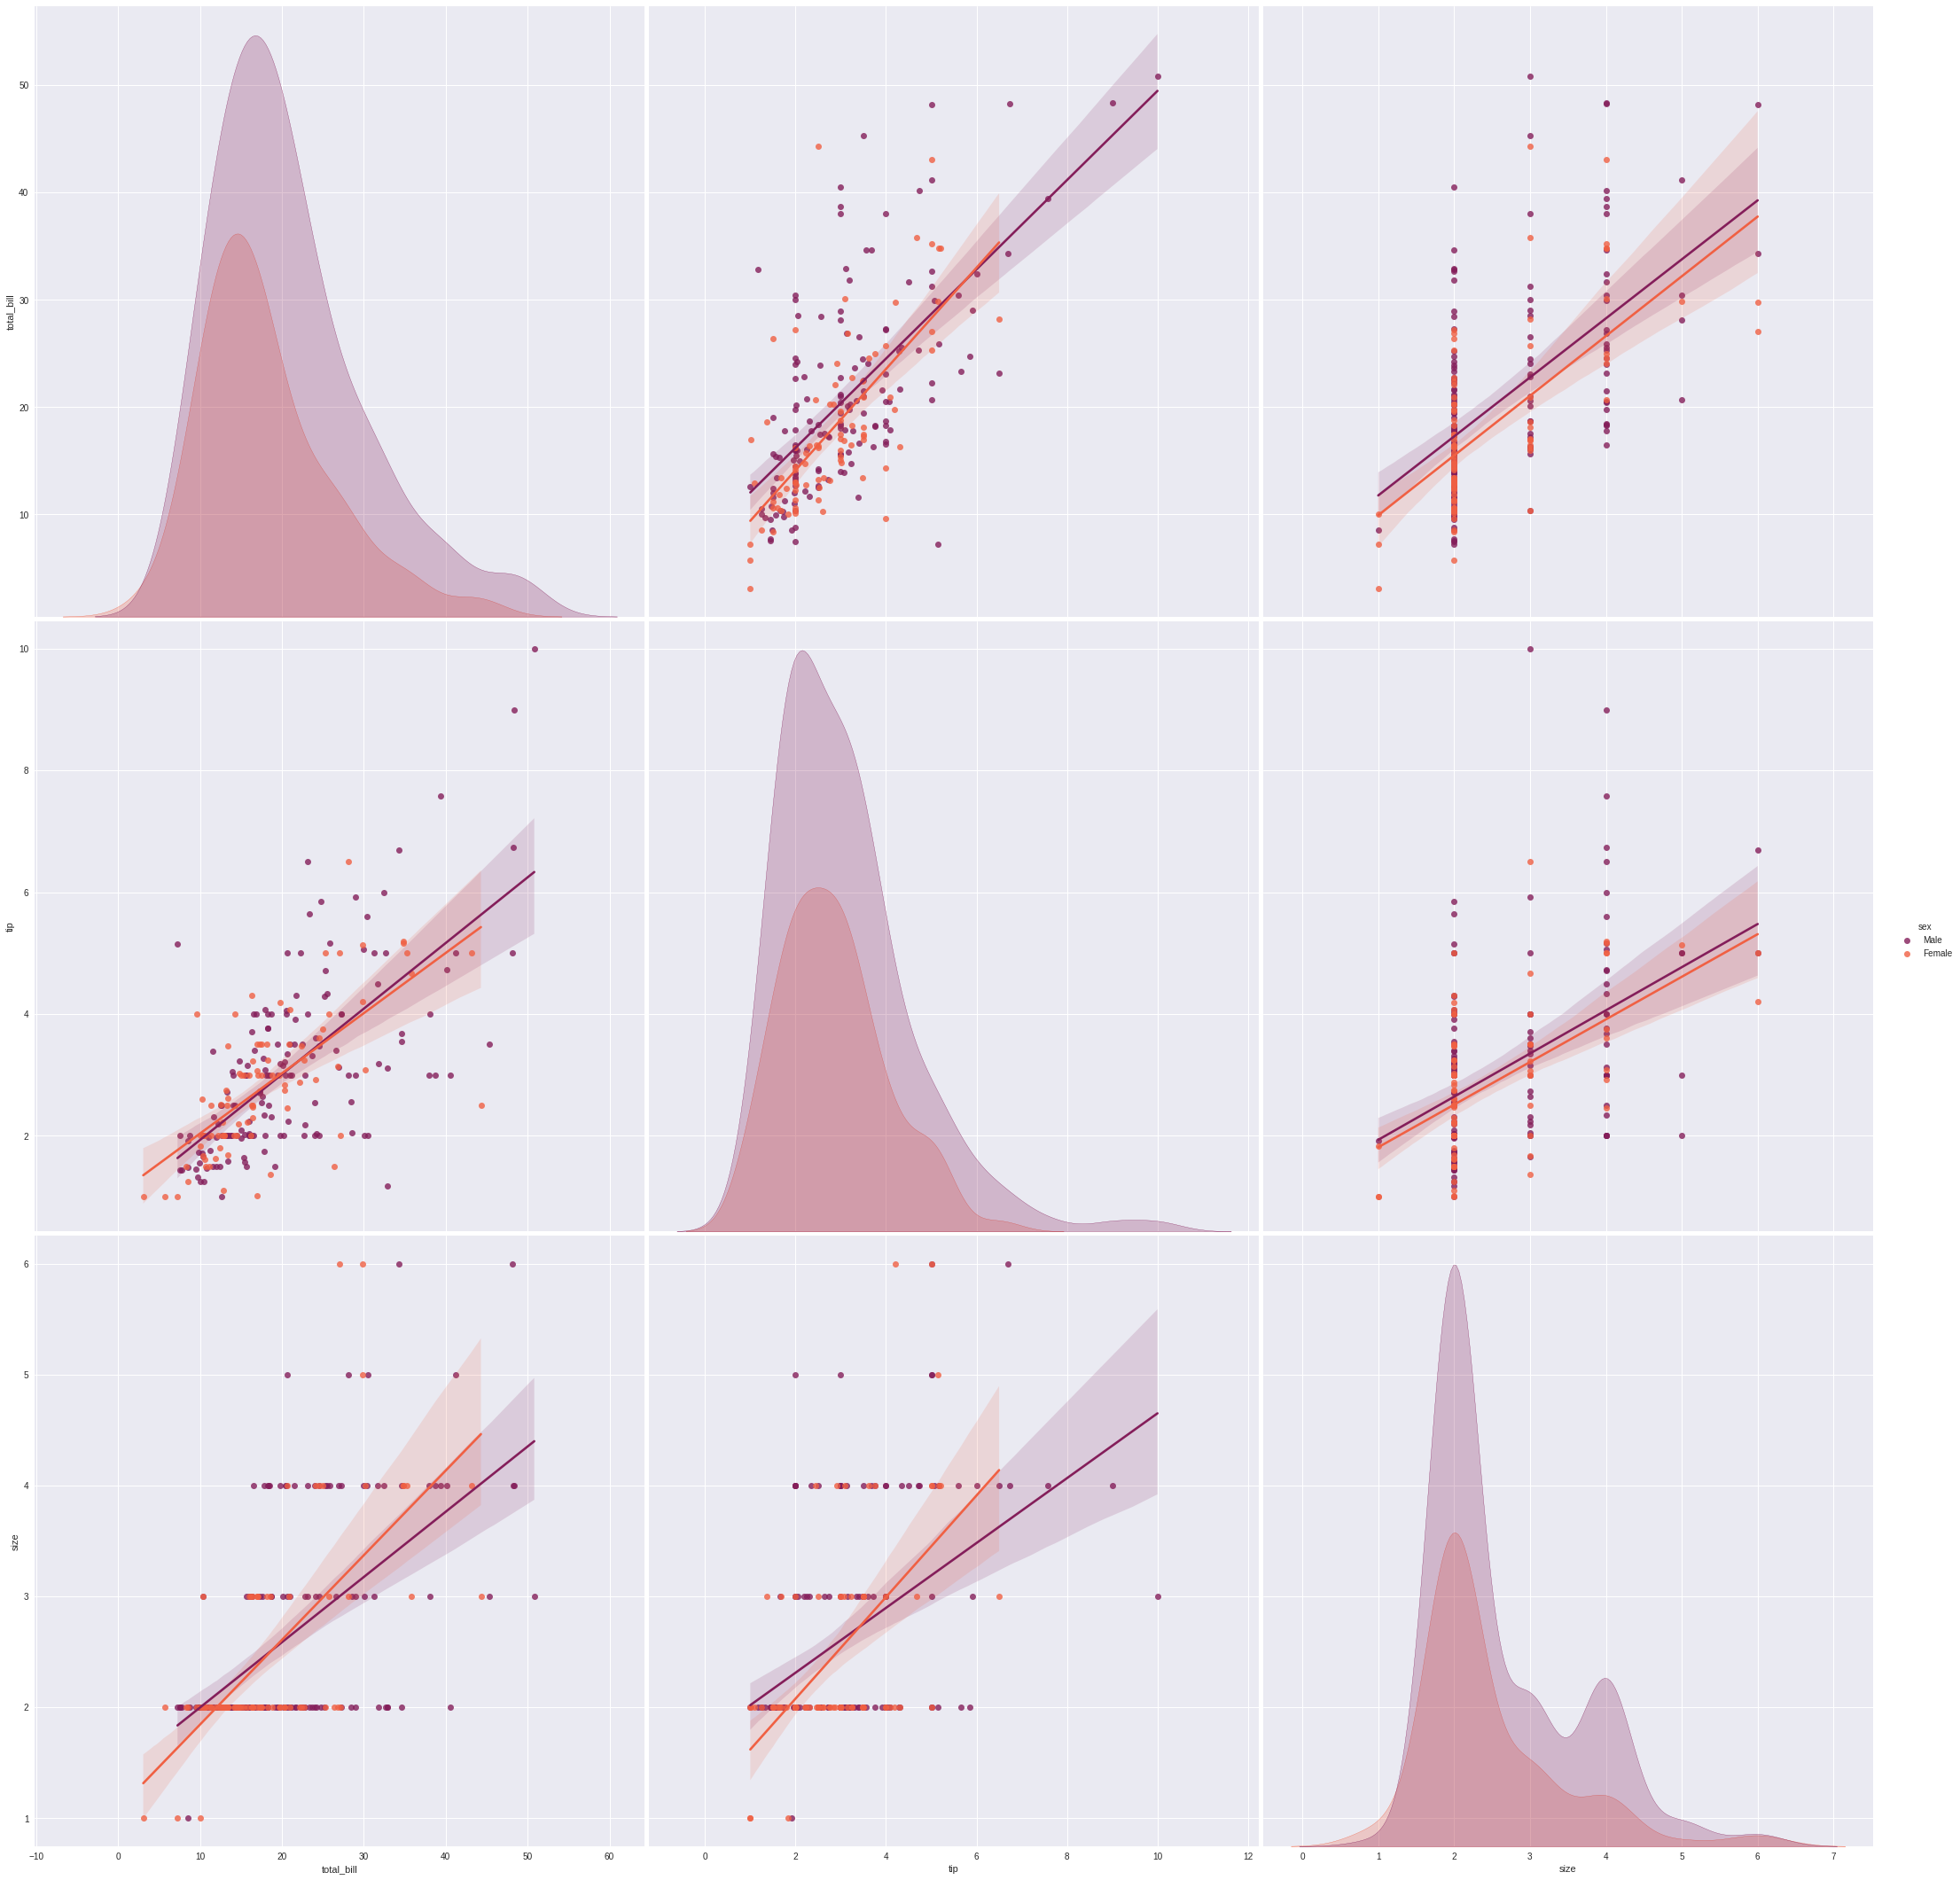

In [22]:
sns.pairplot(dataset,hue='sex', kind='reg',palette='rocket', height=10, )

## 4) combine plot using map_upper

với chức năng ".map_upper()" đồ thị sẽ vẽ đồ thị bên trên diagonal subplots

Chức năng này chỉ áp dụng với đồ thị có tính năng PairGrid

Thông số:

pairplot(
  
    bộ dữ liệu,
    hue='sex', :  hỗ trợ đối số màu sắc (cho categorical, boolean)
    diag_kind='hist' : Thay đổi diagonal thành Histogram nhưng sẽ không ảnh hưởng off-diagonal
    palette='rocket' : set bộ màu do có nhiều hơn 1 giá trị, 
    height=10, : set kích thước cho biểu đồ
    
)

map_upper(
  
    sns.kdeplot, : Tên plot mới trên diagonal subplots (ví dụ: kdeplot)
    
);

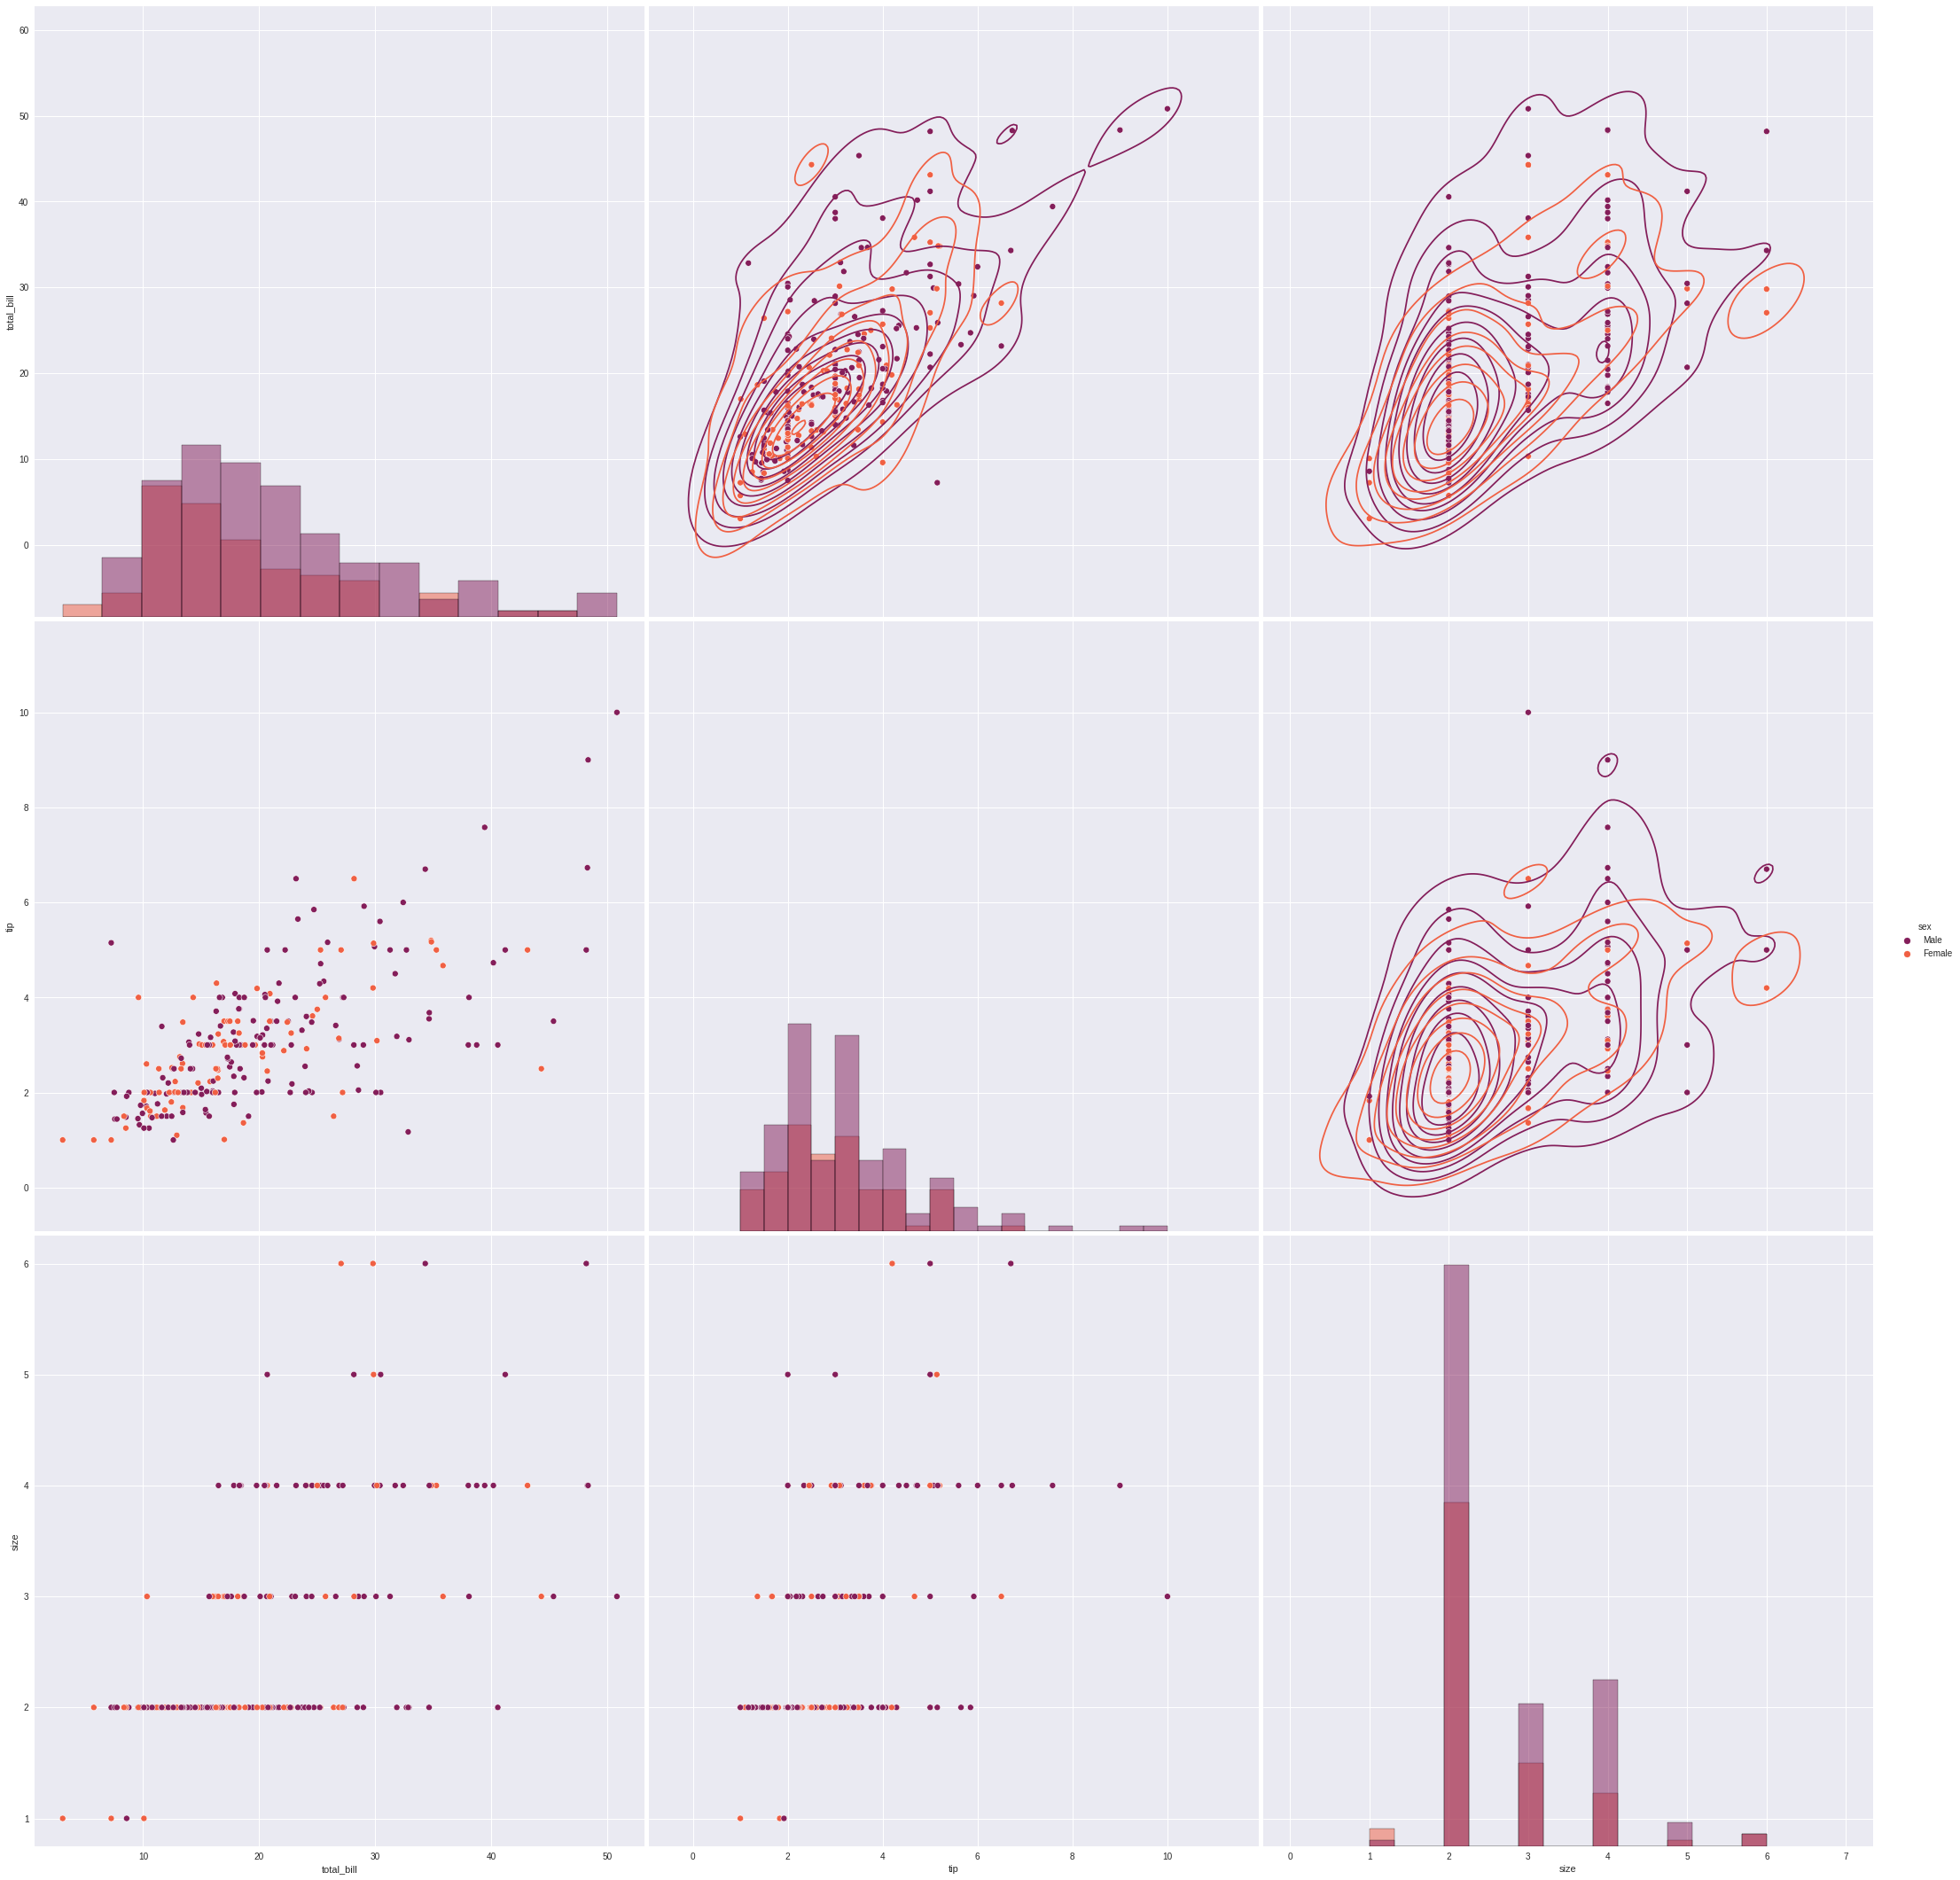

In [23]:
pp1 = sns.pairplot(dataset,hue='sex', diag_kind='hist',palette='rocket', height=10, )
pp1.map_upper(sns.kdeplot);

In [24]:
print(type(pp1))

<class 'seaborn.axisgrid.PairGrid'>


## 5) Displace desire plot only

Với các chức năng này sẽ chỉ hiện một vài subplot trong plot

### a) with 'vars'

Thông số:

pairplot(
  
    bộ dữ liệu,
    hue='sex', :  hỗ trợ đối số màu sắc (cho categorical, boolean)
    vars=['total_bill', 'tip'],  : hiện biểu đồ các biến theo nhu cầu
    height=10, : set kích thước cho biểu đồ
    
)

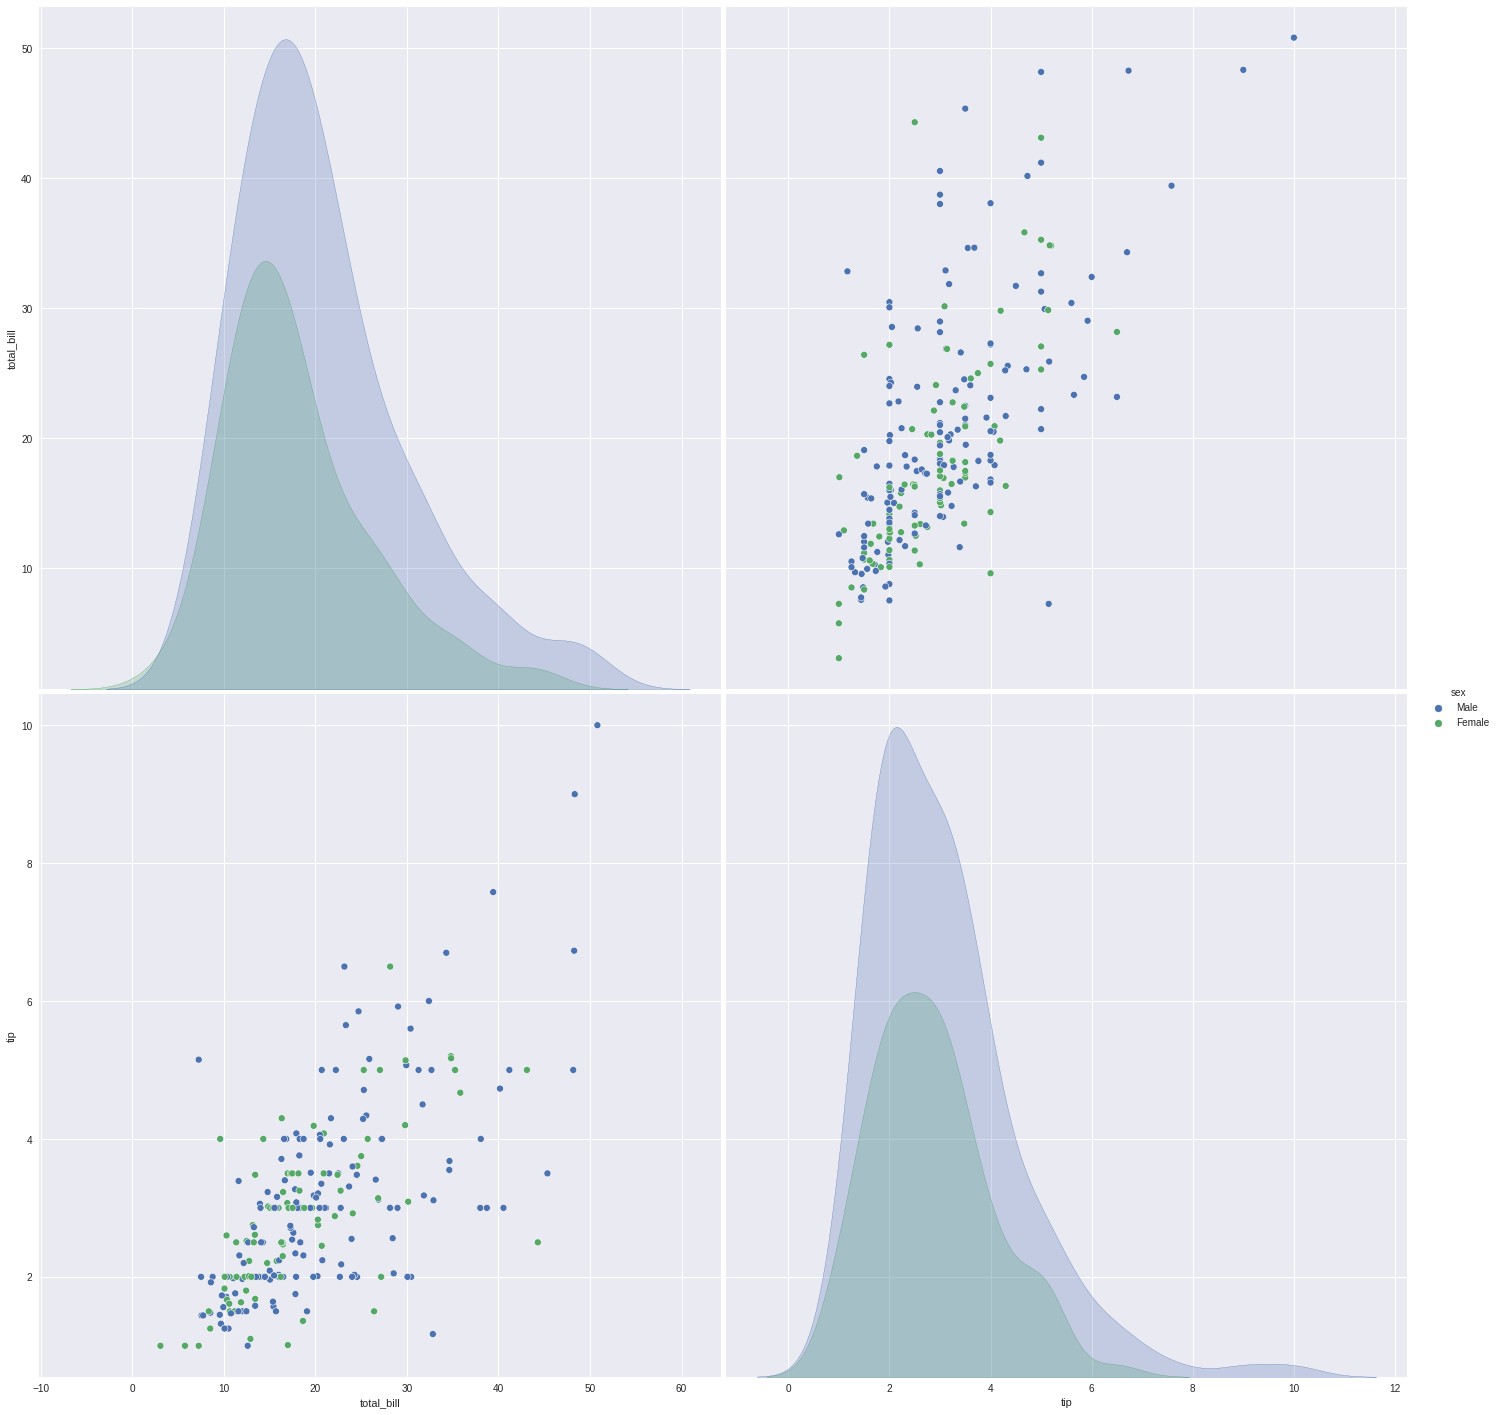

In [25]:
 sns.pairplot(dataset, hue='sex', vars=['total_bill', 'tip'], height=10);

### b) with  'x_vars', 'y_vars'





Thông số:

pairplot(
  
    bộ dữ liệu,
    hue='sex', :  hỗ trợ đối số màu sắc (cho categorical, boolean)
    y_vars=['tip'], : hiện biểu đồ các biến theo nhu cầu trên trục y
    x_vars=['total_bill', 'size'], :  hiện biểu đồ các biến theo nhu cầu trên trục x
    kind='reg' : Thay đổi off-diagonal thành regression nhưng sẽ không ảnh hưởng diagonal
    palette='rocket' : set bộ màu do có nhiều hơn 1 giá trị, 
    height=10, : set kích thước cho biểu đ
    
)

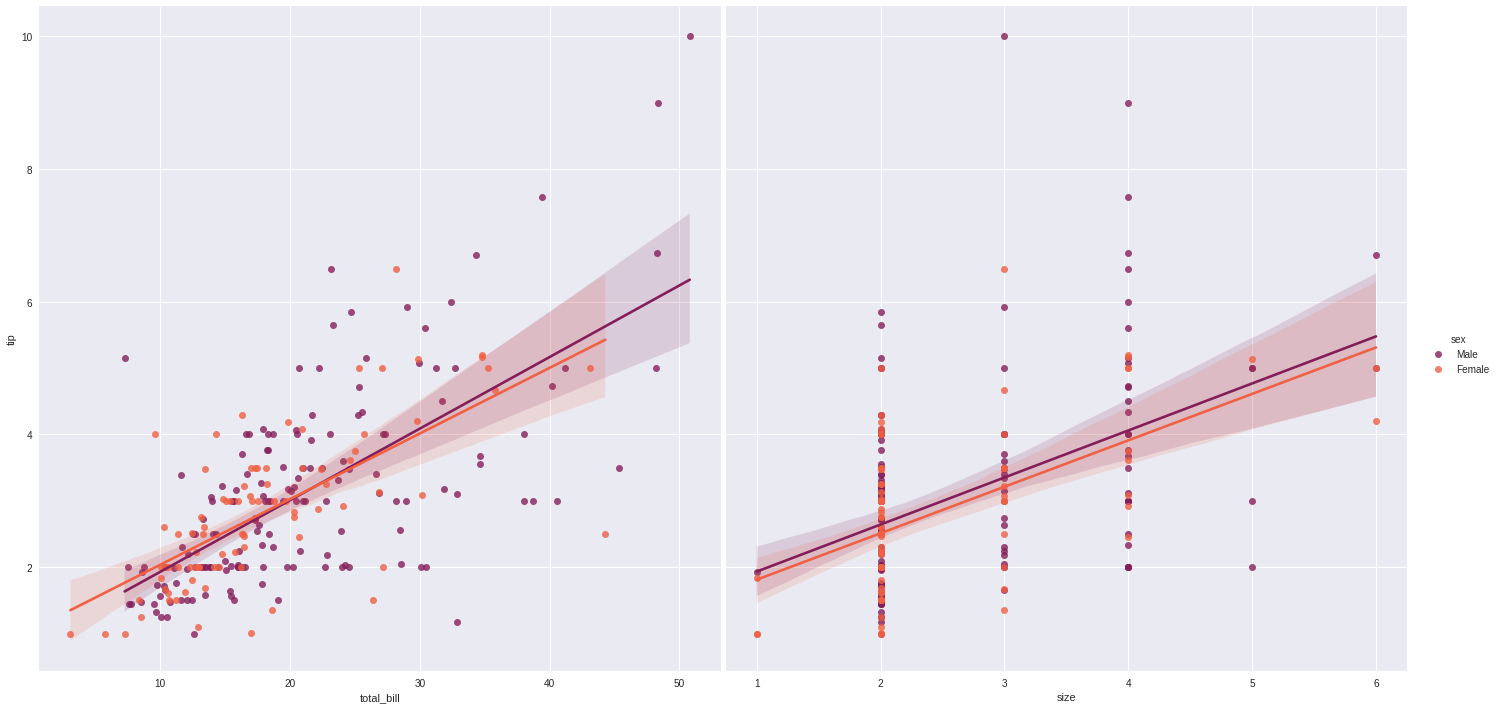

In [26]:
 sns.pairplot(dataset, 
              hue='sex', 
              y_vars=['tip'],
              x_vars=['total_bill', 'size'],
              kind='reg',
              palette='rocket',
              height=10);

## 6) Customize height and aspect

Thông số:

pairplot(
  
    bộ dữ liệu,
    hue='sex', :  hỗ trợ đối số màu sắc (cho categorical, boolean)
    diag_kind='hist' : Thay đổi off-diagonal thành regression nhưng sẽ không ảnh hưởng diagonal
    palette='rocket' : set bộ màu do có nhiều hơn 1 giá trị, 
    height=10, : set kích thước cho biểu đồ
    aspect= 3 : thể hiện độ dài của các sub đồ thị (số càng lớn sub đồ thị càng dài)
    
)

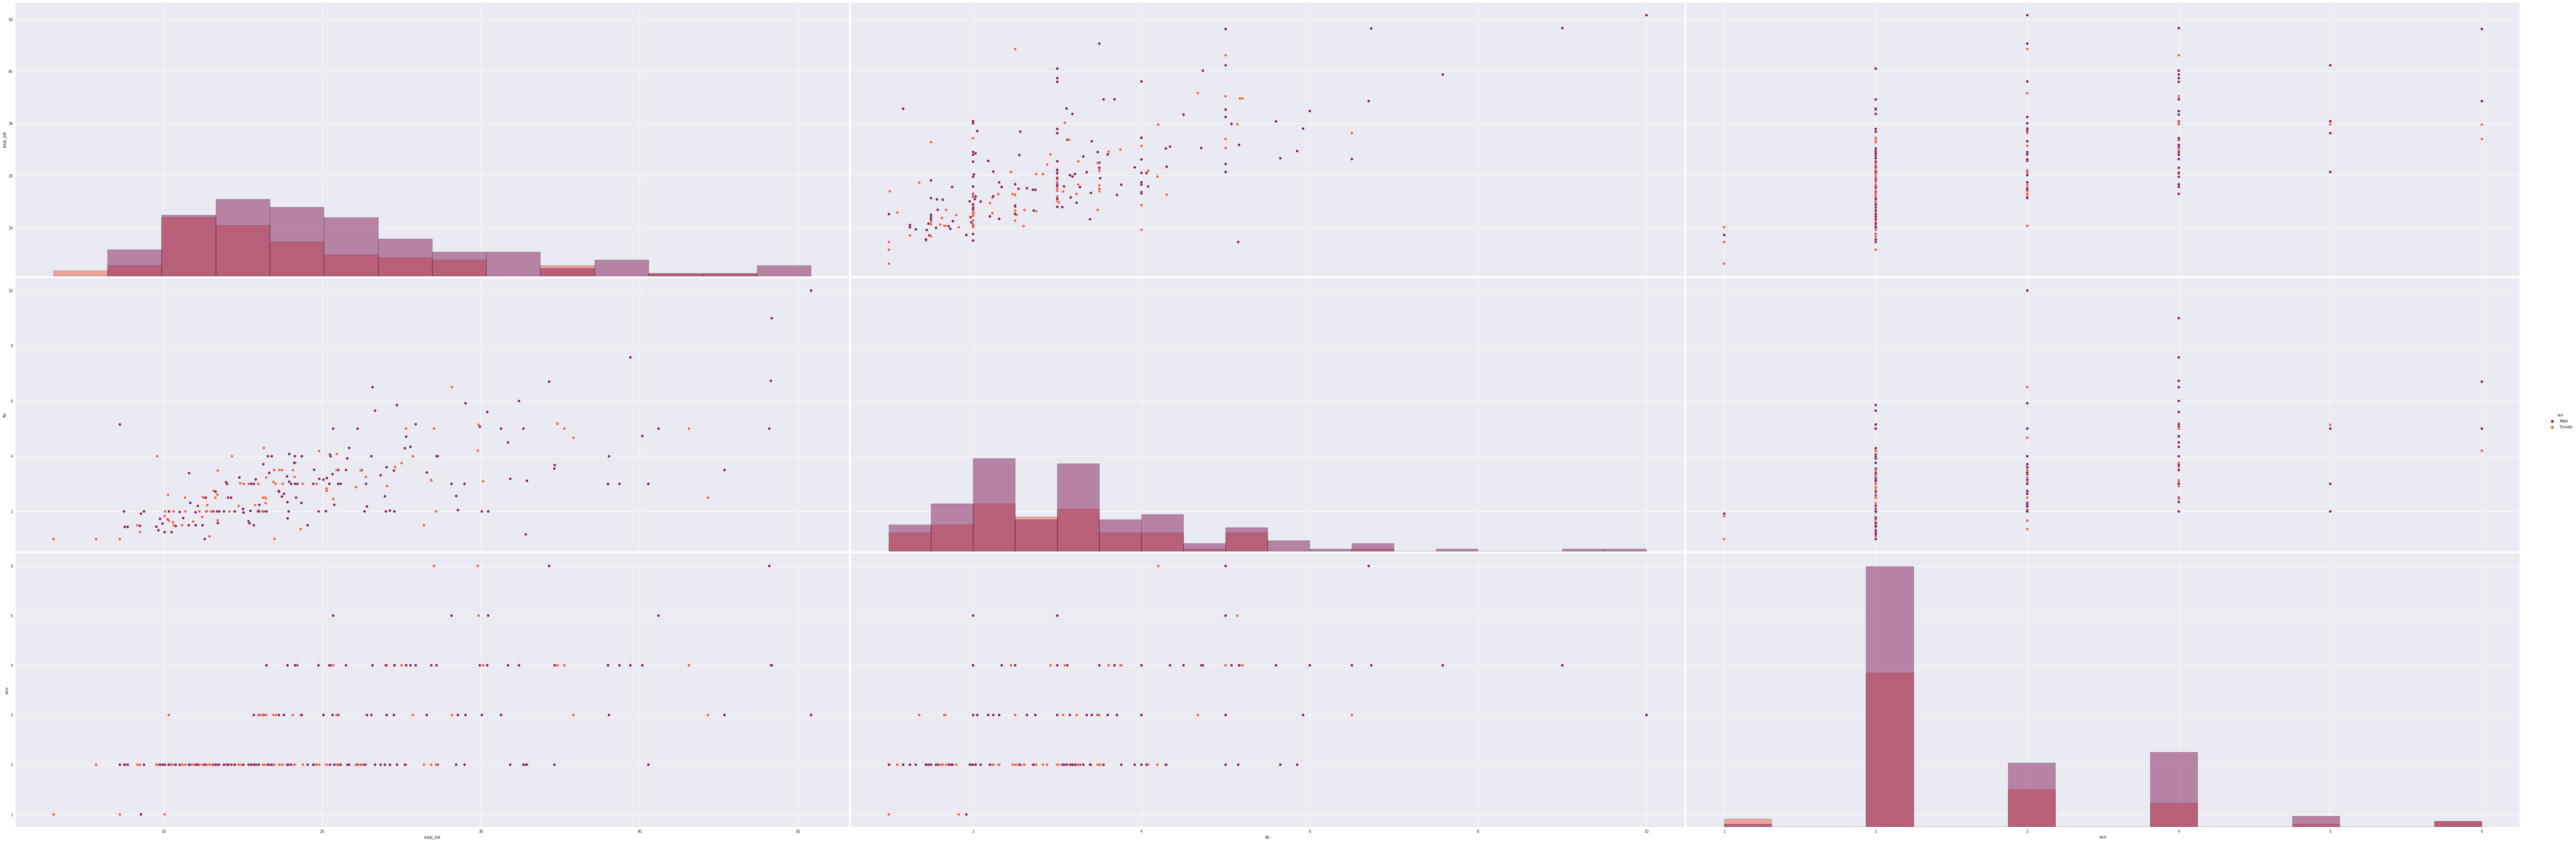

In [27]:
sns.pairplot(dataset,hue='sex', diag_kind='hist',palette='rocket', height=10, aspect= 3);

## 7) Customize diagonal or off-diagonal seseparately

### a) Customize diagonal

Em có thể chỉnh sửa các properties của diagonal thông qua "diag_kws=", thông tin được nhập là 1 dictionary

Thông số:

diag_kws={
  
    'color':"gray" : chỉnh sửa màu sắc của đồ thị diagonal
}



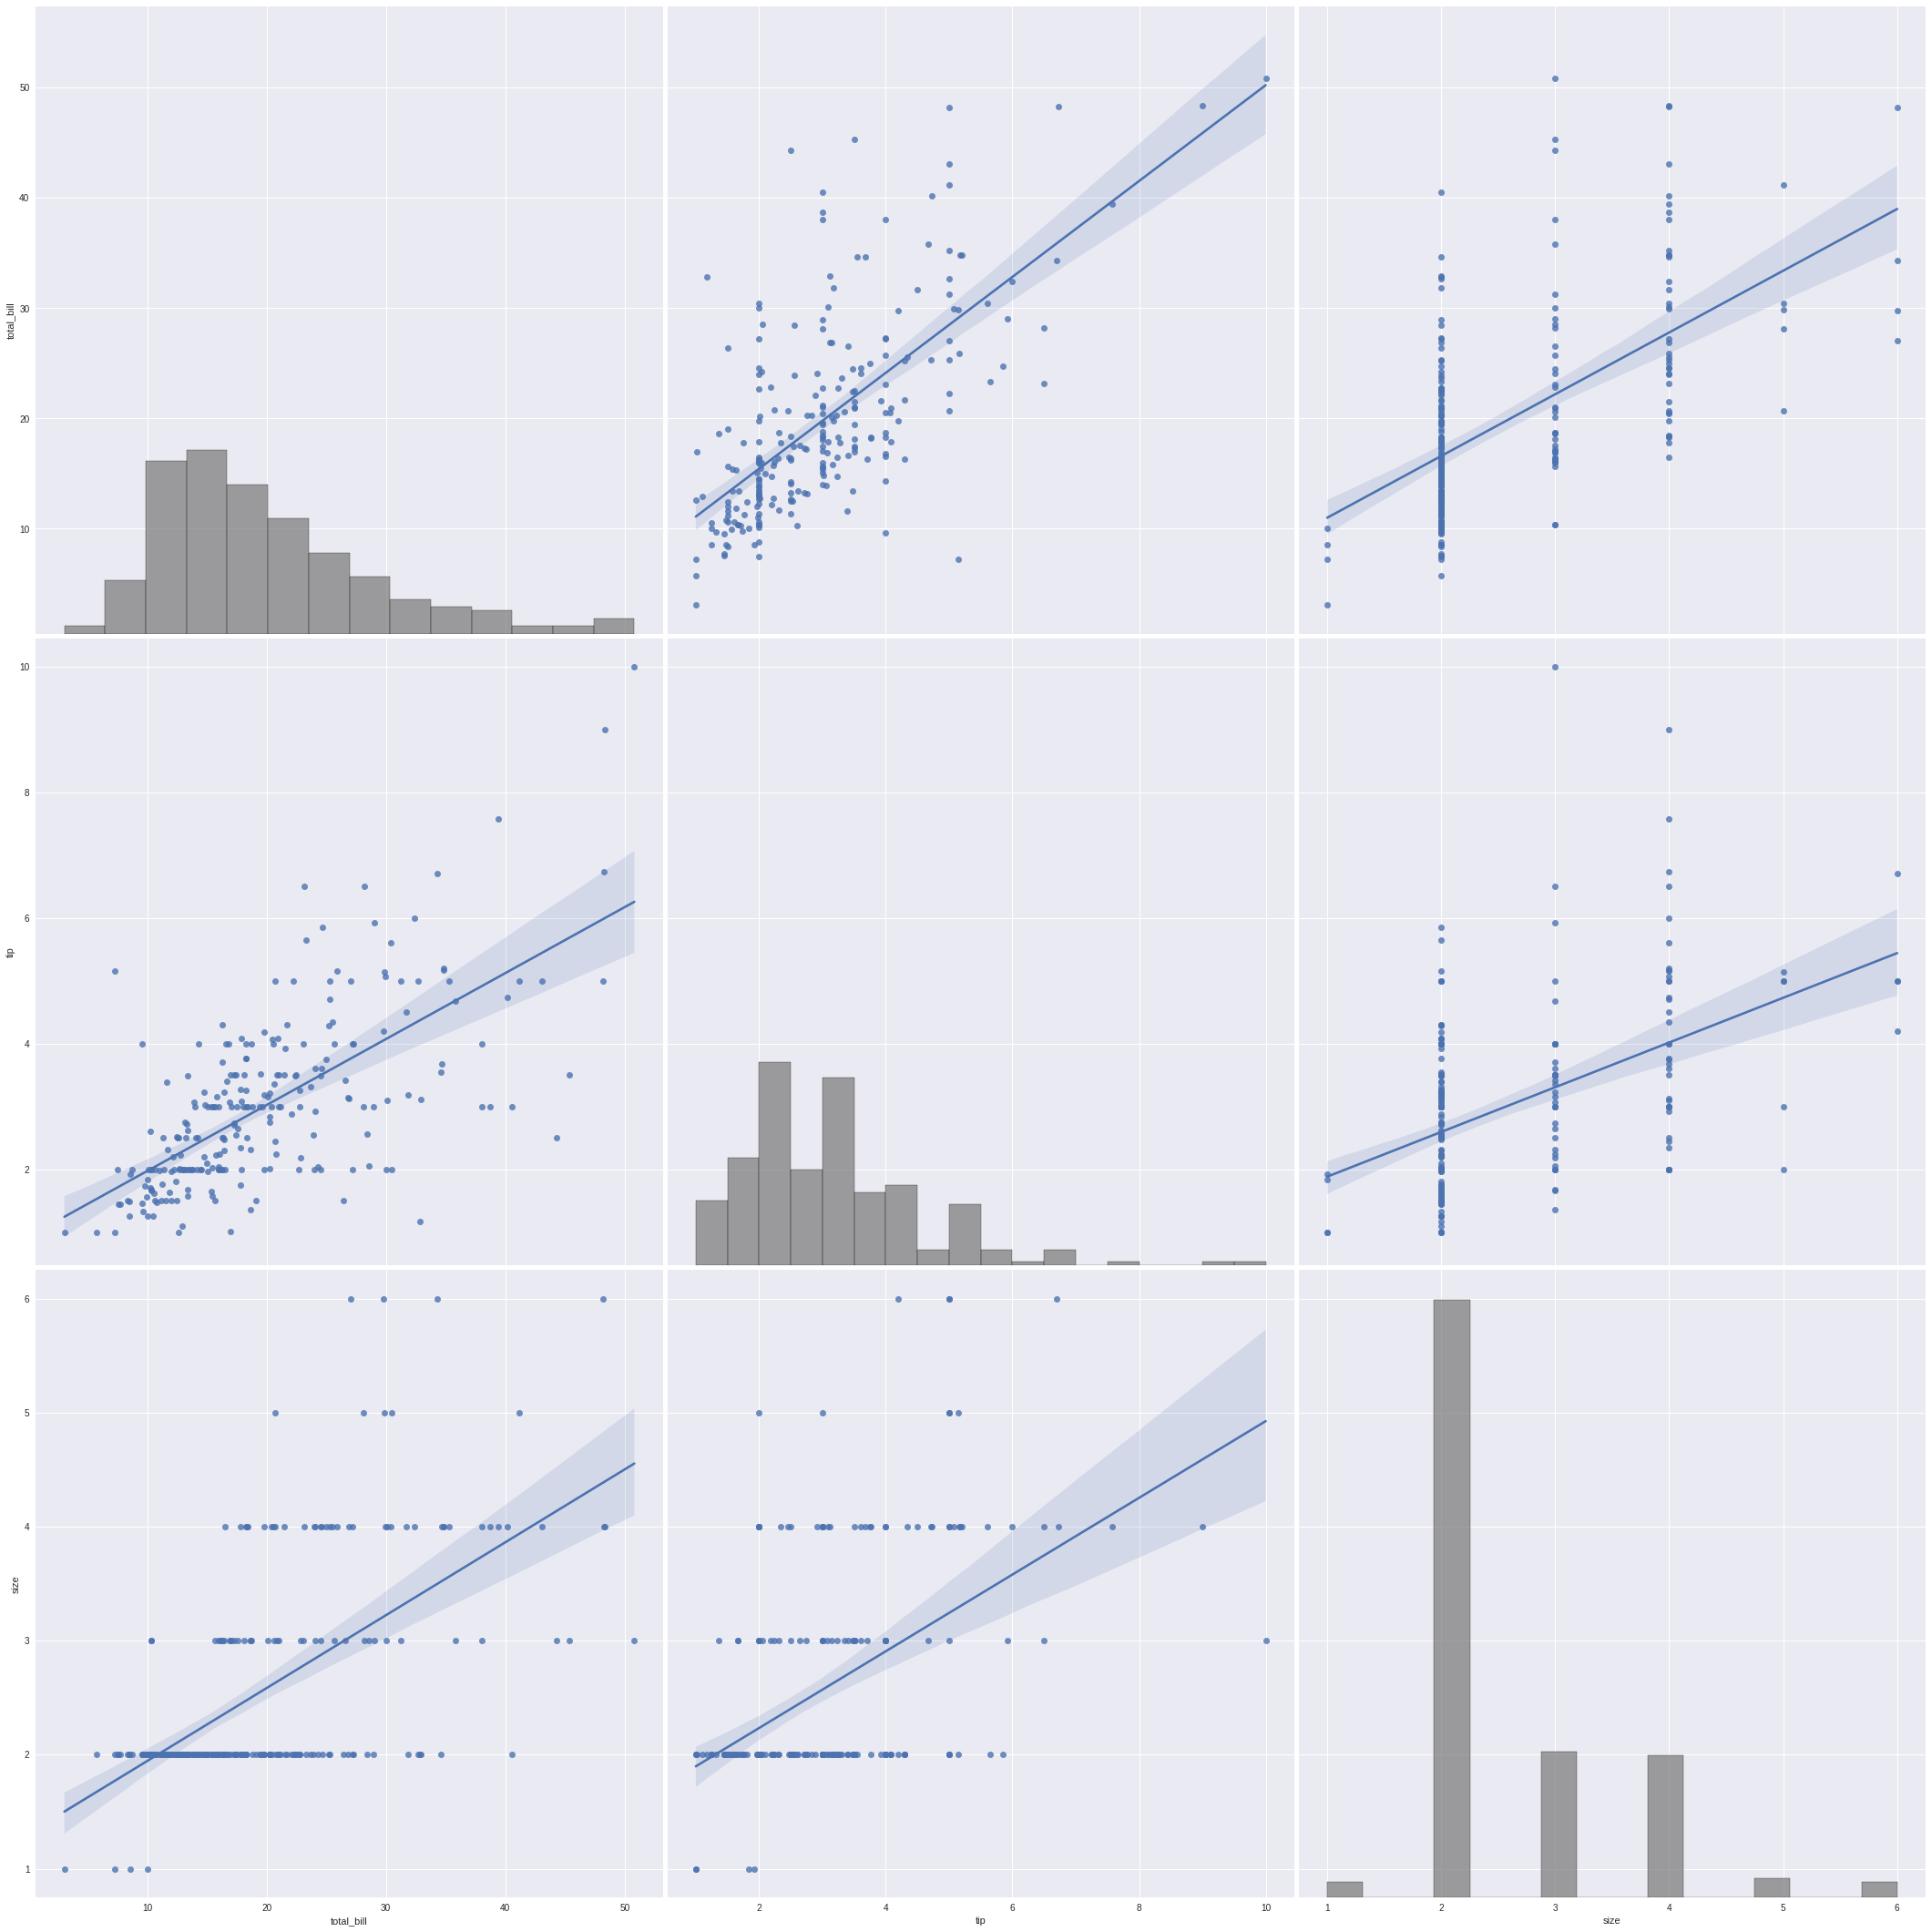

In [28]:
sns.pairplot(dataset, kind='reg', height=10, diag_kws={'color':"gray"})

### b) Customize off-diagonal

Em có thể chỉnh sửa các properties của off-diagonal thông qua "plot_kws=", thông tin được nhập là 1 dictionary

Thông số:

plot_kws={
  
    'ci':None, : Tắt chức năng hiện khoảng tin cậy (Confidence Interval)
    'color': 'red', : Màu của plot sẽ là màu của regression line
    'scatter_kws':{'color': 'black'} : scatter keywords sẽ chỉnh sửa properties scatter point để có tùy chỉnh riêng biệt và sẽ nhập bằng dictionary
                      
}


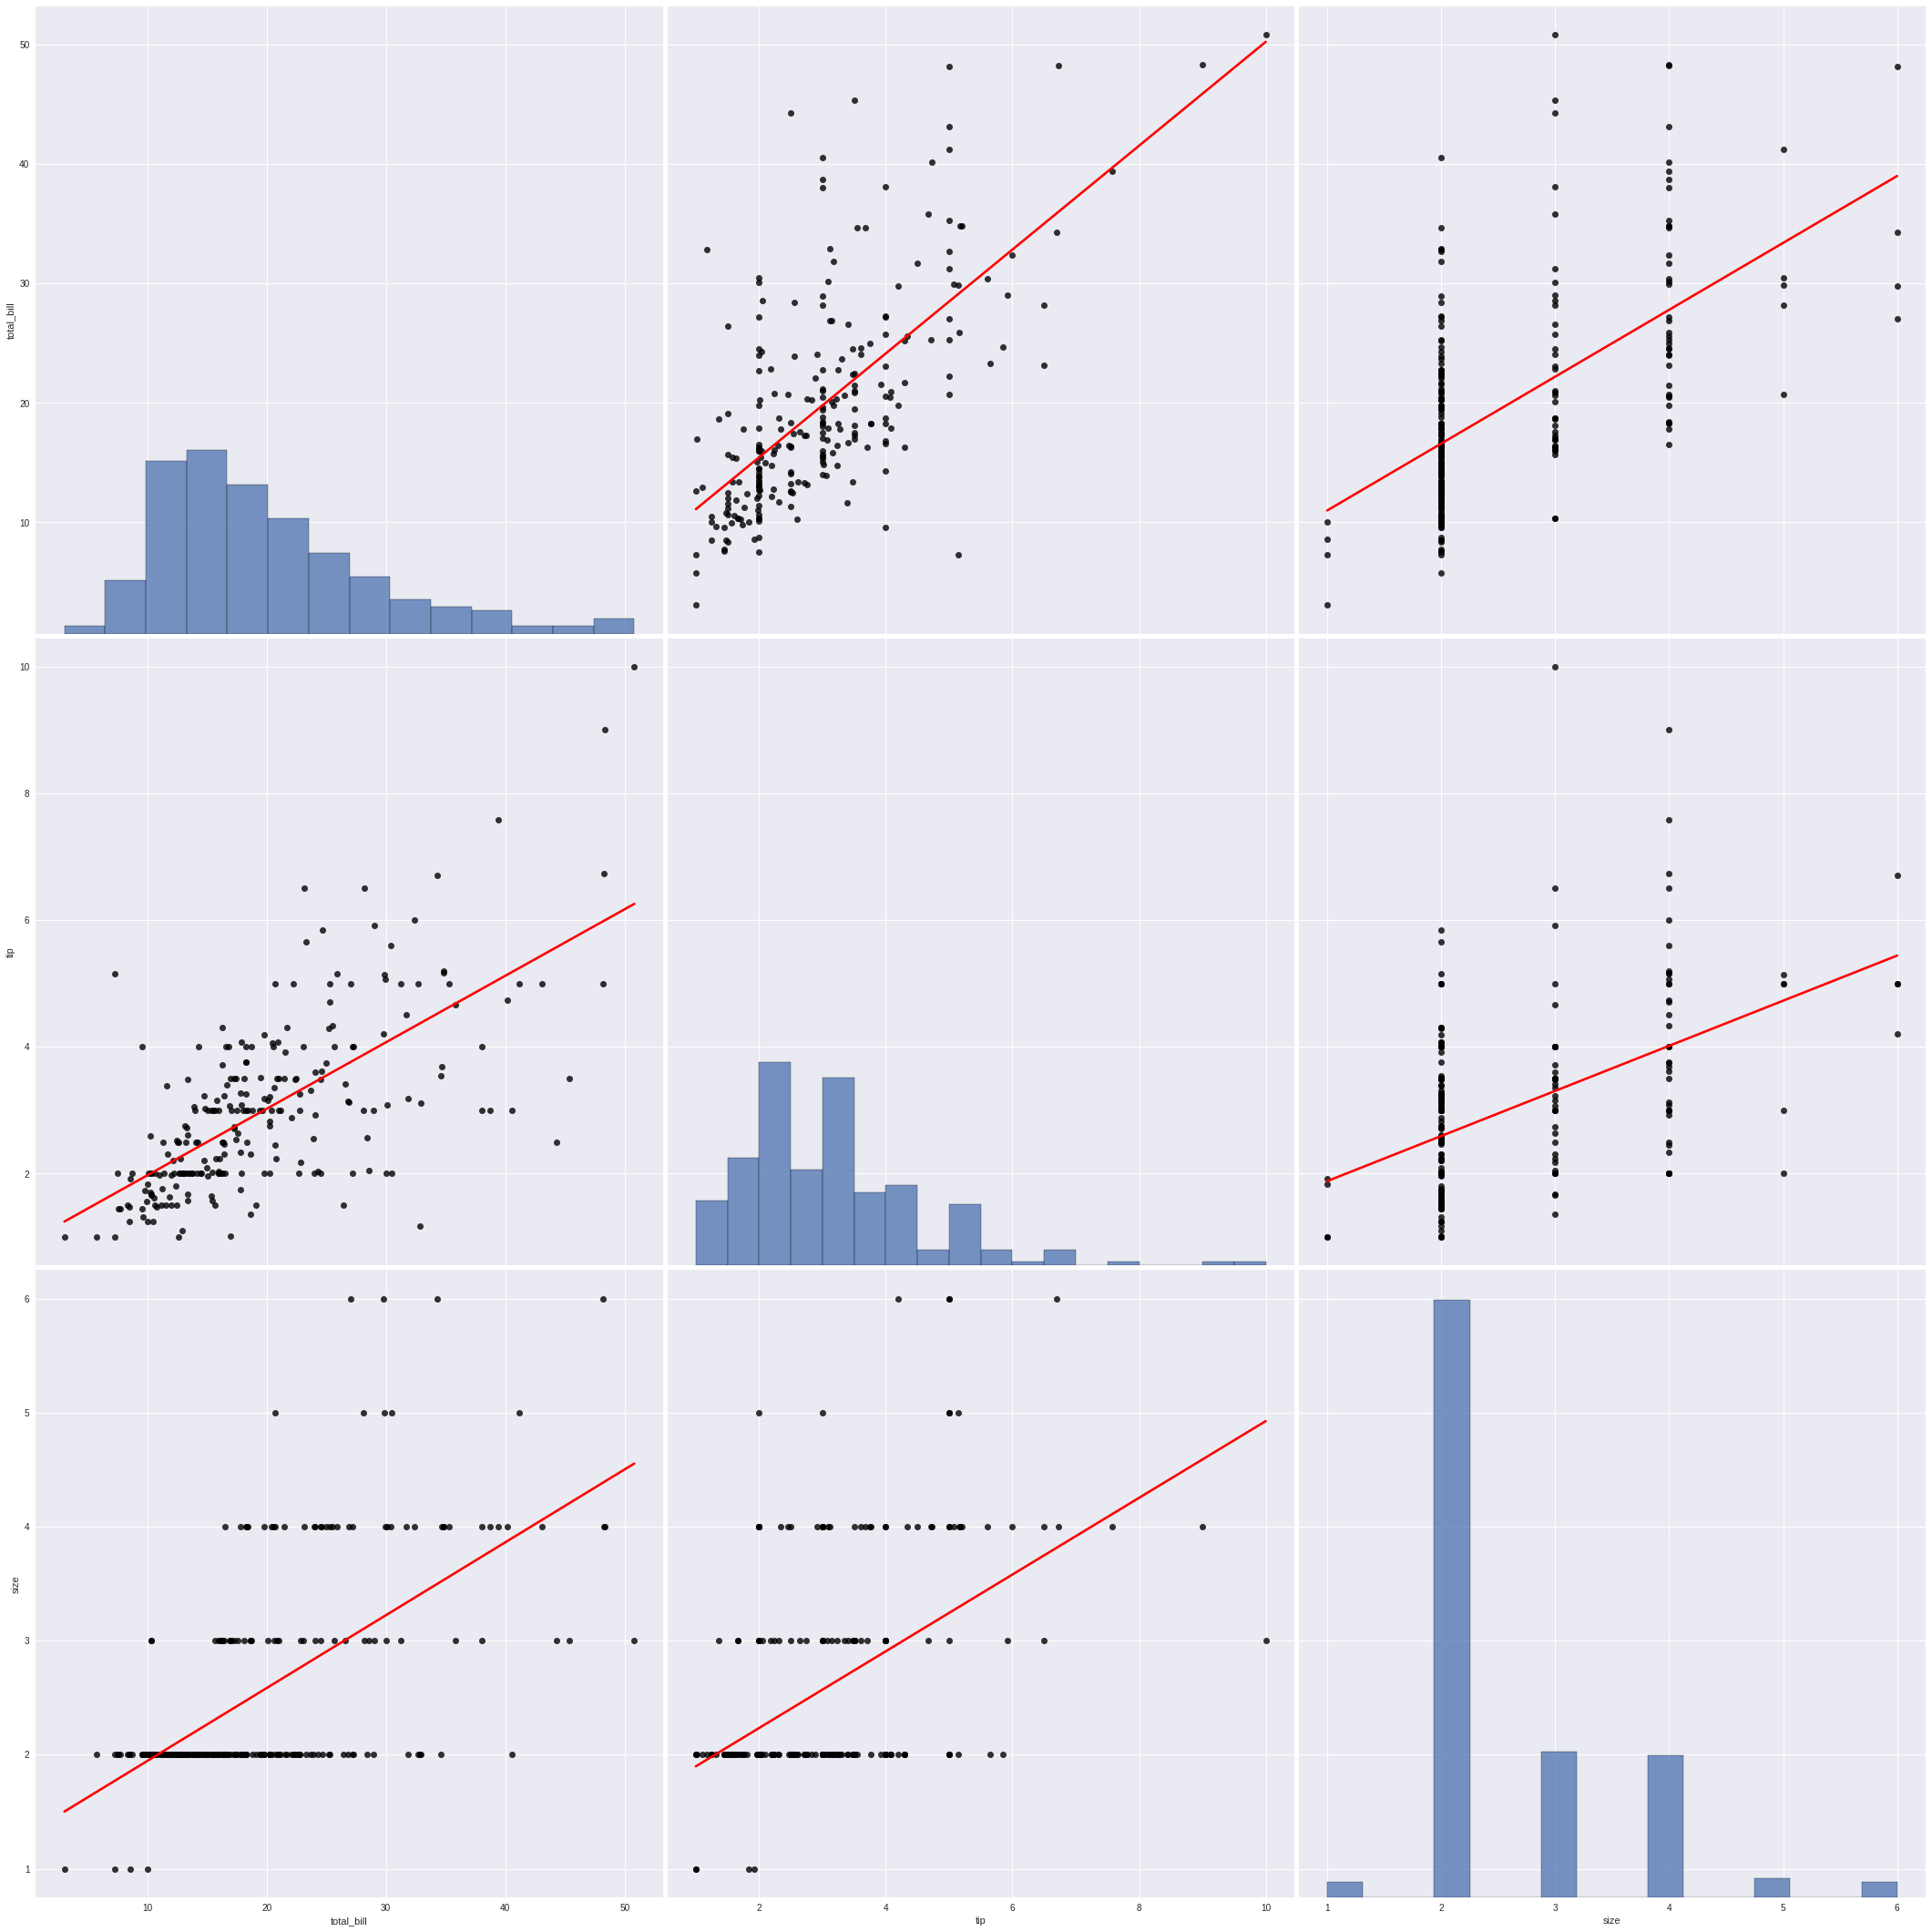

In [29]:
sns.pairplot(dataset, 
             kind='reg',
             height=10, 
             plot_kws={'ci':None,
                       'color': 'red',
                       'scatter_kws':{'color': 'black'}
                      }
             )